# Hands-on Session on "AI in Modern Biology"

Welcome to the exciting world of Artificial Intelligence in Modern Biology! In this hands-on tutorial, we will embark on a journey that combines the power of data exploration and machine learning to unlock the secrets hidden within biological datasets. As we dive into the fascinating realm of Jupyter Notebooks, we will discover how AI can revolutionize our understanding of biological systems, enabling us to make predictions and gain valuable insights.

The topic for today's session will be:

## "Revolutionizing Reproductive Health: The Role of AI in Optimizing Fertility and Maternal Care"

Artificial Intelligence (AI) has emerged as a powerful tool in the realm of healthcare, revolutionizing various aspects of patient care. This research delves into the pivotal role of AI in optimizing fertility and maternal care, highlighting its potential to improve outcomes for both prospective parents and expectant mothers.

Artificial Intelligence (AI) offers several advantages in the fields of fertility and healthcare, revolutionizing the way we approach these critical aspects of human well-being:
1. *Personalized Treatment Plans*
2. *Early Disease Detection*
3. *Enhanced Diagnostic Accuracy*
4. *Research and Data Insights*
5. *Predictive Analytics and many more...*

Here is a short tutorial on how you can download your datasets from kaggle:
1. Go to the website www.kaggle.com
2. If you are new to Kaggle then sign up using your Email ID and login into Kaggle.
3. It will direct you to your Kaggle Home Page, click on *Datasets* tab from left hand panel of your home screen.
4. Search for your dataset using keywords and select the one which you find most useful and related.
5. You would be able to see the deatils of your dataset.
6. To download, simply click on the *Download* tab from upper right corner. 
7. Your dataset would be available in the Downloads section of your device as a Zip folder. 

### About the Dataset

For this session you'll be provided with a raw datasheet in the form of a CSV file. The datasheet used in this session is entitled as **'ivf_dataset_year_181920'** and it comprises of 12 Coulmns or Attributes named as:
- Date
- Age 
- Cycle
- Infertility Type
- Duration of Infertility
- AMH 
- Eggs
- Embryo Transfer
- Indication
- Sperm Type
- BMI
- BhCG

For our reseach we would be using 11 of the above attributes, the 'Date' column has nothing productive in Model building & EDA so we will drop it later in our session. Also, it comprises of zero null values.

BhCG stands for *Beta-Human Chorionic Gonadotropin* which is a hormone produced a week after conception. A Positve BhCG test results in pregnancy whereas Negative means not pregnant.

According to our dataset, we have:
- 823 ~ Positive
- 728 ~ Negative

*With our Machine Learning Model running over Test dataset, we will try to find either the patient is BhCG Positive or Negative*

### Objective
- Performing Exploratory Data Analysis (EDA) and application of Data Visulaization 
- Building a prediction model using different Machine Learning (ML) algorithms
- Importance of Hyperparameter Tuning in Model Building

# Exploratory Data Analysis (EDA) 
It is a data analysis approach that involves summarizing and visualizing data to gain insights and a better understanding of its characteristics. EDA helps identify patterns, trends, outliers, and relationships within a dataset, which can be valuable for making data-driven decisions and informing further analysis or modeling. It typically includes techniques such as data visualization, summary statistics, and data cleaning to prepare data for more in-depth analysis.

We'll be using **Jupyter Notebook** as our IDE *(Integrated Development Environment)* due to its various features such as:
1. Interactive Computing
2. Support for multiple languages.
3. Numerous Libraries and Extensions
4. Data Exploration and Visualization

A short guide on how to install and set-up the jupter notebook environment is available here - [Tutorial](https://youtu.be/DKiI6NfSIe8?si=qGd6uBl1adENKfwU). Other IDE's like Google Colab or VSCode can also be used. 

*Note - # will be used for making comments in between code lines*

###  Importing libraries

In [1]:
import numpy as np               # dealing with arrays
import pandas as pd              # working on data frame
import matplotlib.pyplot as plt  # visualizing data 
%matplotlib inline               
import seaborn as sns            # visualizing data

If you are using these libraries for the first time then you need to install them using *!pip install* command into your Terminal

###  Dataset

In [2]:
df = pd.read_csv(r'C:\Users\kesha\Desktop\project P\r1551_c11_ivf_dataset_year181920.csv')

df here stands for *Data Frame* which is where we are storing our csv data file using *read_csv* command with *pandas* library. Although any name can be used in place of df. Copy the path of your csv data file and place *.csv* in the end.

### Data Exploration

In [3]:
df.shape                        
# Returns the no. of rows and columns present in the dataset

(1551, 12)

In [4]:
df.info()
# Returns the information of our dataset like Data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1551 entries, 0 to 1550
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     1551 non-null   object 
 1   Age                      1551 non-null   float64
 2   Cycle                    1551 non-null   int64  
 3   Infertility Type         1551 non-null   int64  
 4   Duration of Infertility  1551 non-null   float64
 5   AMH                      1551 non-null   float64
 6    Eggs                    1551 non-null   int64  
 7   Embryo Transfer          1551 non-null   object 
 8   Indication               1551 non-null   object 
 9   Sperm Type               1551 non-null   object 
 10  BMI                      1551 non-null   float64
 11  BhCG                     1551 non-null   object 
dtypes: float64(4), int64(3), object(5)
memory usage: 145.5+ KB


In [5]:
df.head()
# Returns the first 5 rows in our dataset

,Date,Age,Cycle,Infertility Type,Duration of Infertility,AMH,Eggs,Embryo Transfer,Indication,Sperm Type,BMI,BhCG
0,01-01-2018,27.0,1,2,1.0,3.14,10,OnlyFreshcycle,Tubal,Normal,29.30,Negative
1,01-01-2018,33.0,1,1,3.0,16.85,26,OnlyFET,Unexplained,Normal,28.91,Positive
2,01-01-2018,36.0,1,1,1.0,0.56,12,OnlyFreshcycle,Unexplained,Normal,28.16,Negative
3,01-01-2018,37.0,1,1,7.0,1.30,3,OnlyFreshcycle,Male,OATs,26.42,Negative
4,01-01-2018,27.0,1,1,3.0,3.56,17,Freshcycle_and_FET,Tubal,Normal,24.00,Negative


*If you want to see last 10 values of the dataset use(-10)*

In [6]:
df.head(-10)

,Date,Age,Cycle,Infertility Type,Duration of Infertility,AMH,Eggs,Embryo Transfer,Indication,Sperm Type,BMI,BhCG
0,01-01-2018,27.0,1,2,1.0,3.14,10,OnlyFreshcycle,Tubal,Normal,29.30,Negative
1,01-01-2018,33.0,1,1,3.0,16.85,26,OnlyFET,Unexplained,Normal,28.91,Positive
2,01-01-2018,36.0,1,1,1.0,0.56,12,OnlyFreshcycle,Unexplained,Normal,28.16,Negative
3,01-01-2018,37.0,1,1,7.0,1.30,3,OnlyFreshcycle,Male,OATs,26.42,Negative
4,01-01-2018,27.0,1,1,3.0,3.56,17,Freshcycle_and_FET,Tubal,Normal,24.00,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...
1536,11/30/2020,32.0,1,1,2.0,3.00,7,OnlyFET,Endometriosis,Normal,21.92,Positive
1537,12-02-2020,29.0,1,1,3.0,2.29,14,OnlyFET,Unexplained,Normal,24.44,Positive
1538,12-03-2020,33.0,2,1,3.0,0.43,6,OnlyFET,Unexplained,Normal,32.77,Negative
1539,12-05-2020,36.0,1,3,4.0,1.64,12,OnlyFreshcycle,Unexplained,Normal,24.22,Negative


In [7]:
df.describe()
# Returns description of the data in the DataFrame (like Count,Min,Max,etc...)

,Age,Cycle,Infertility Type,Duration of Infertility,AMH,Eggs,BMI
count,1551.000000,1551.000000,1551.000000,1551.000000,1551.000000,1551.000000,1551.000000
mean,32.934623,1.299162,1.406834,4.346003,3.013765,11.722115,26.326834
std,4.116883,0.679273,0.532970,3.326885,2.948296,7.591984,4.359959
min,21.000000,1.000000,1.000000,0.000000,0.000000,0.000000,13.890000
25%,30.000000,1.000000,1.000000,2.000000,1.220000,6.000000,23.440000
50%,33.000000,1.000000,1.000000,3.000000,2.200000,10.000000,25.810000
75%,36.000000,1.000000,2.000000,6.000000,3.795000,16.000000,28.620000
max,46.000000,8.000000,3.000000,22.000000,28.700000,52.000000,68.170000


In [8]:
pd.isnull(df).sum()
# Returns if there is a null value and its sum (total null values)

Date                       0
Age                        0
Cycle                      0
Infertility Type           0
Duration of Infertility    0
AMH                        0
 Eggs                      0
Embryo Transfer            0
Indication                 0
Sperm Type                 0
BMI                        0
BhCG                       0
dtype: int64

In [9]:
df.columns
# Returns the name of all columns present in the dataframe

Index(['Date', 'Age ', 'Cycle', 'Infertility Type', 'Duration of Infertility',
       'AMH ', ' Eggs', 'Embryo Transfer', 'Indication', 'Sperm Type', 'BMI',
       'BhCG'],
      dtype='object')

### Data Analysis & Visulalization using Line graphs
Visulaizing data helps in gaining insights and better understanding of data variation through the entire dataset and it is a crucial component while performing EDA.

##### ~ For BMI

Text(0.5, 1.0, 'BMI')

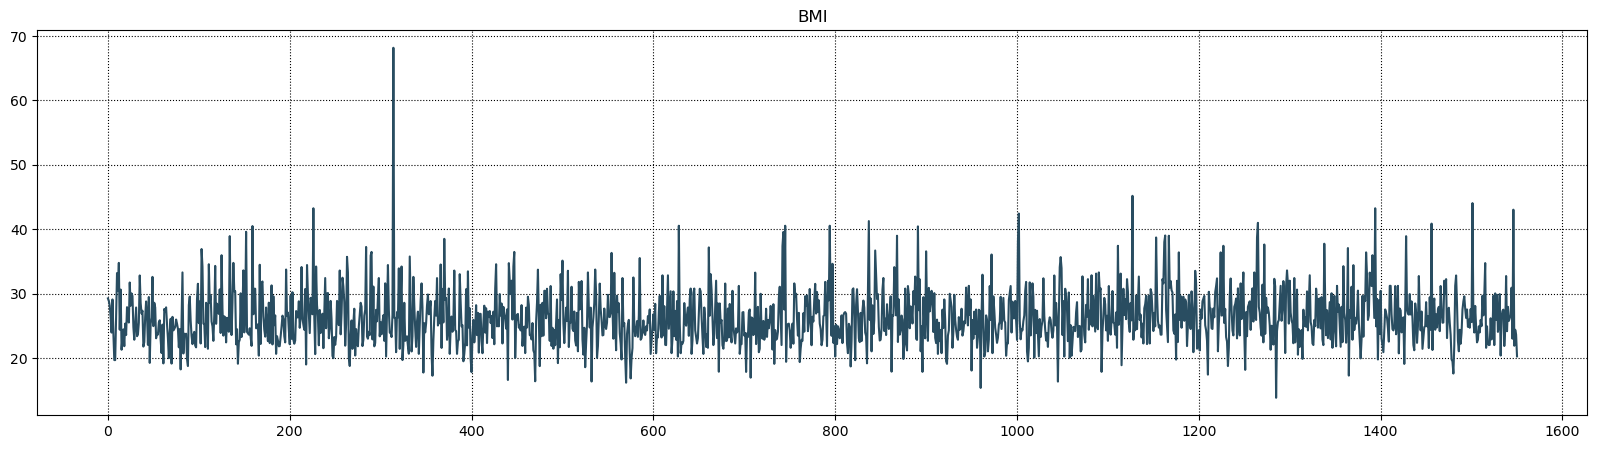

In [10]:
from matplotlib import rcParams

# Set the figure size
rcParams['figure.figsize'] = 20,5

# Enable grid lines
plt.grid(True, color='k', linestyle=':')

# Plotting BMI from DataFrame with color code
plt.plot(df["BMI"], color='#294D61')

# Set the title
plt.title("BMI")

##### ~ For Egg

Text(0.5, 1.0, 'Eggs')

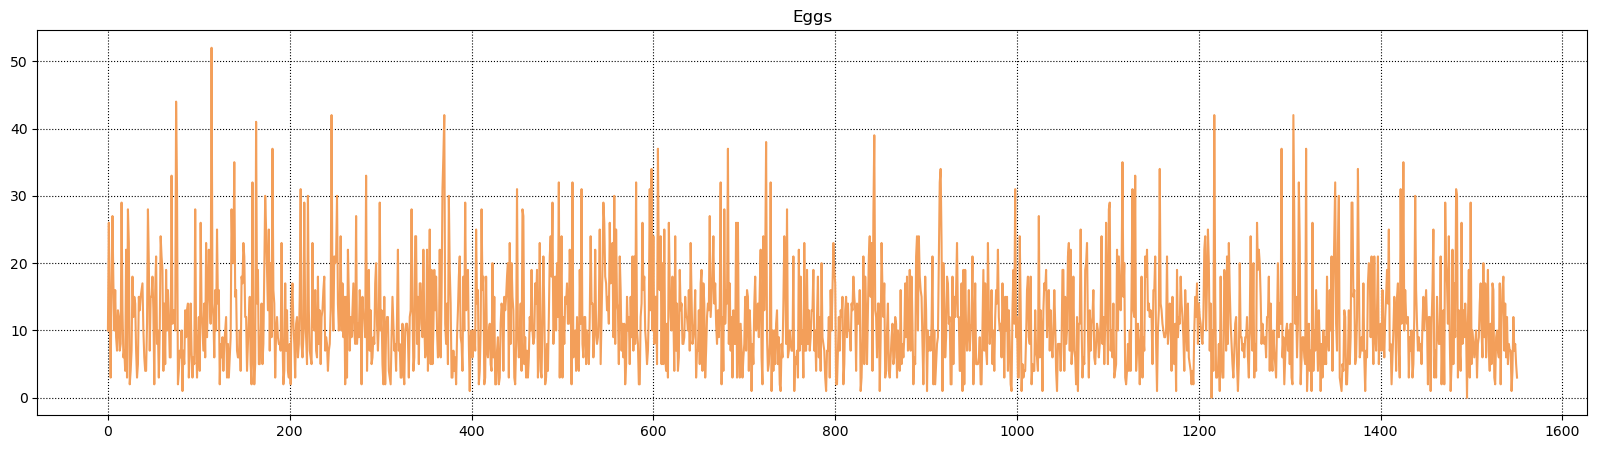

In [11]:
rcParams['figure.figsize'] = 20,5
plt.grid(True ,color ='k' ,linestyle =':')
plt.plot(df[" Eggs"] ,color = '#F39F5A')
plt.title("Eggs")

##### ~ For AMH 

Text(0.5, 1.0, 'AMH')

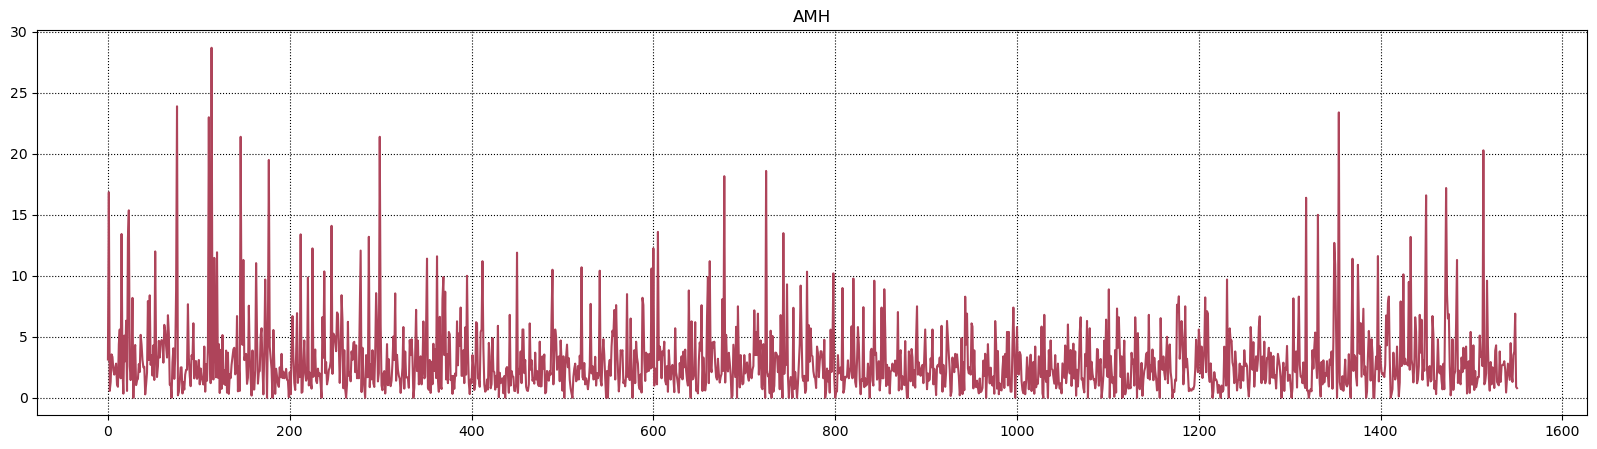

In [12]:
rcParams['figure.figsize'] = 20,5
plt.grid(True ,color ='k' ,linestyle =':')
plt.plot(df["AMH "] ,color = '#AE445A')
plt.title("AMH")

#####  ~ For Duration of Infertility

Text(0.5, 1.0, 'Duration of Infertility')

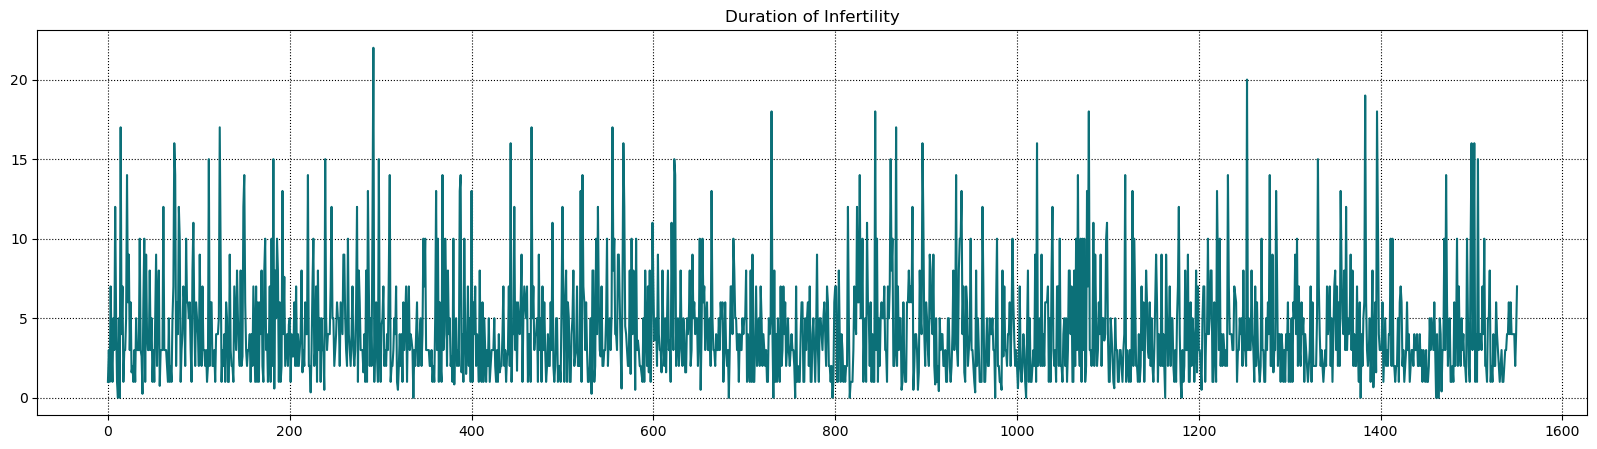

In [13]:
rcParams['figure.figsize'] = 20,5
plt.grid(True ,color ='k' ,linestyle =':')
plt.plot(df["Duration of Infertility"] ,color = '#0C7078')
plt.title("Duration of Infertility")

##### ~ For Age

Text(0.5, 1.0, 'Age')

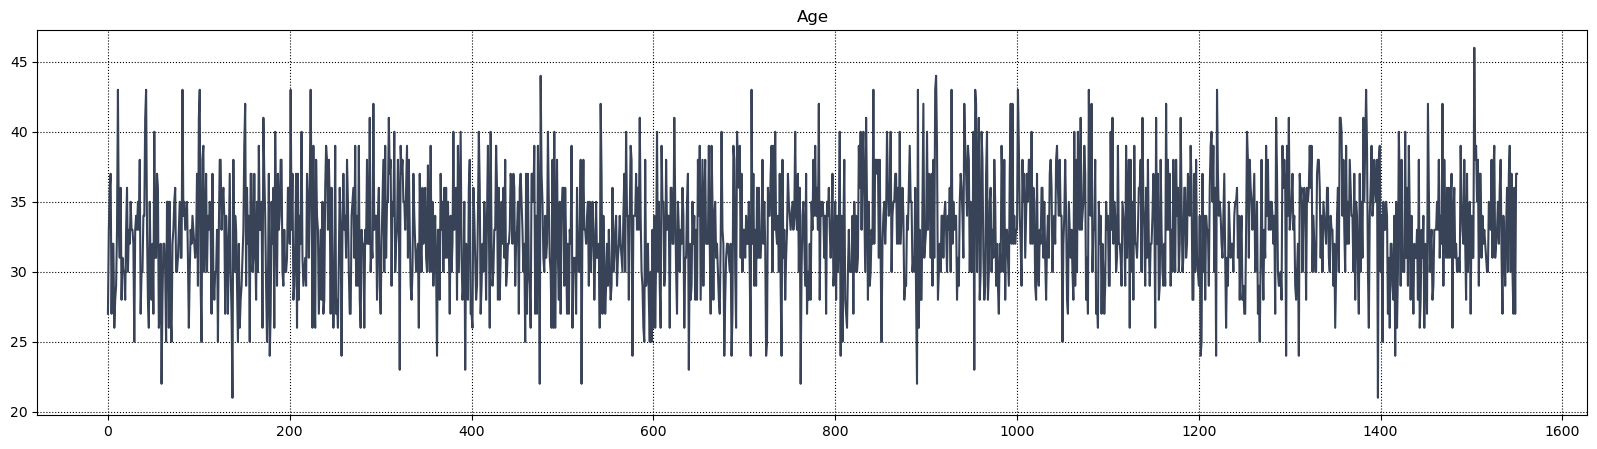

In [14]:
rcParams['figure.figsize'] = 20,5
plt.grid(True ,color ='k' ,linestyle =':')
plt.plot(df["Age "] ,color = '#384358')
plt.title("Age")

### Data Visualization using Bar Graphs (Count Plots)
##### ~ For Infertility Type

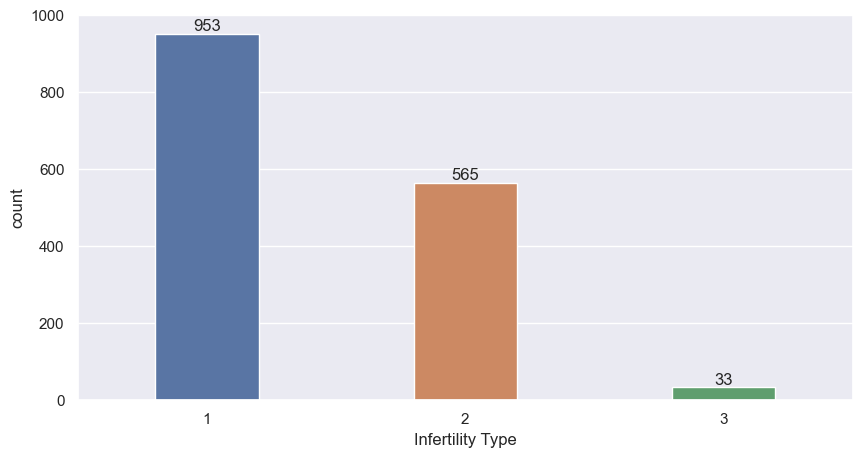

In [16]:
# Create the countplot using seaborn library
ax = sns.countplot(x = 'Infertility Type', data = df, width = 0.4)

# Set the figure size using sns.set()
sns.set(rc={'figure.figsize':(10,5)})

# To see the value count above each bar we are adding labels to it
for bars in ax.containers:
    ax.bar_label(bars)

##### ~ For Cycle

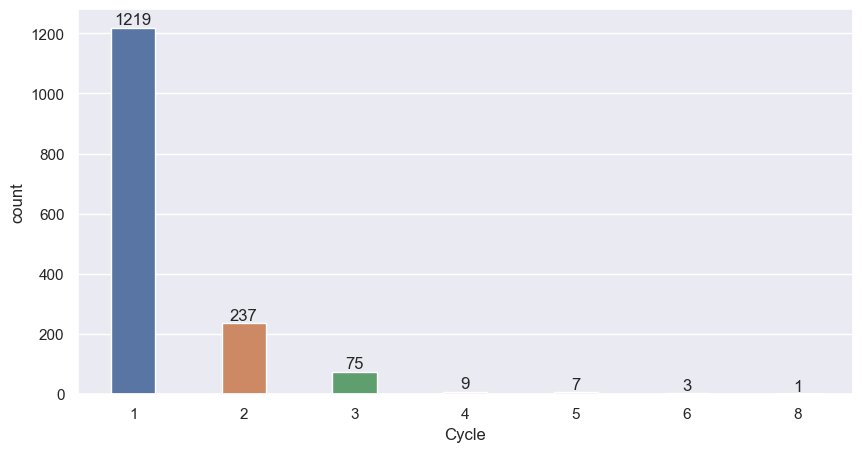

In [17]:
ax = sns.countplot(x = 'Cycle', data = df, width = 0.4)
sns.set(rc={'figure.figsize':(10,5)})

for bars in ax.containers:
    ax.bar_label(bars)

##### ~ For Embryo Transfer


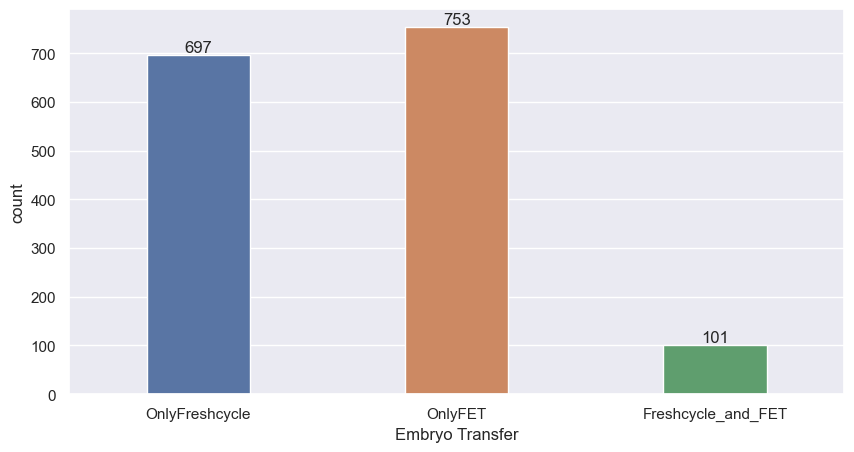

In [18]:
ax = sns.countplot(x = 'Embryo Transfer', data = df, width = 0.4)
sns.set(rc={'figure.figsize':(10,5)})

for bars in ax.containers:
    ax.bar_label(bars)

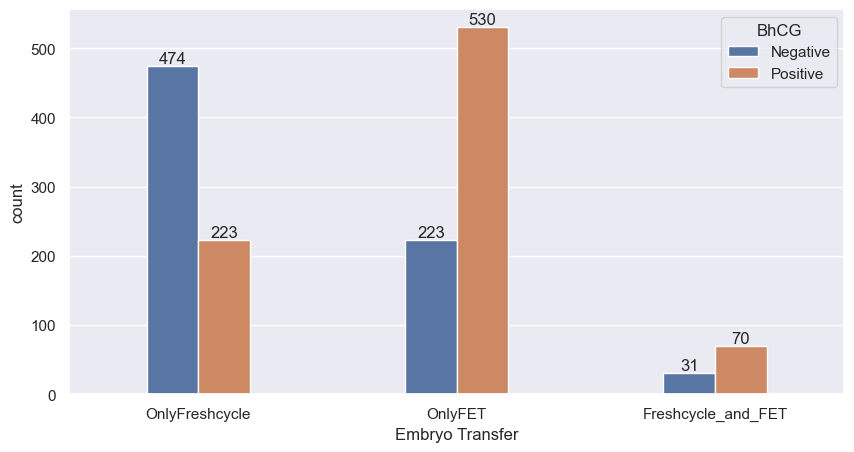

In [19]:
# Comparing the BhCG result distribution in Embryo Transfer by setting hue='BhCG'
ax = sns.countplot(x = 'Embryo Transfer', data = df, width = 0.4, hue = 'BhCG')

for bars in ax.containers:
    ax.bar_label(bars)

##### ~ For Sperm Type 

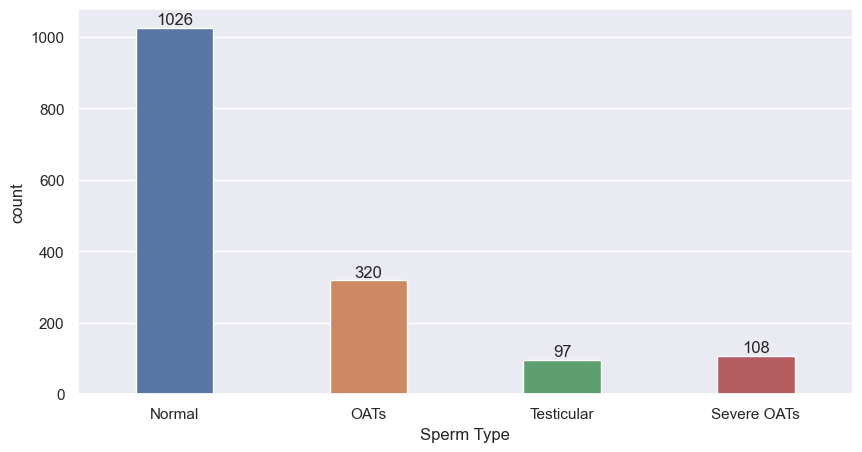

In [20]:
ax = sns.countplot(x = 'Sperm Type', data = df, width = 0.4)
sns.set(rc={'figure.figsize':(10,5)})

for bars in ax.containers:
    ax.bar_label(bars)

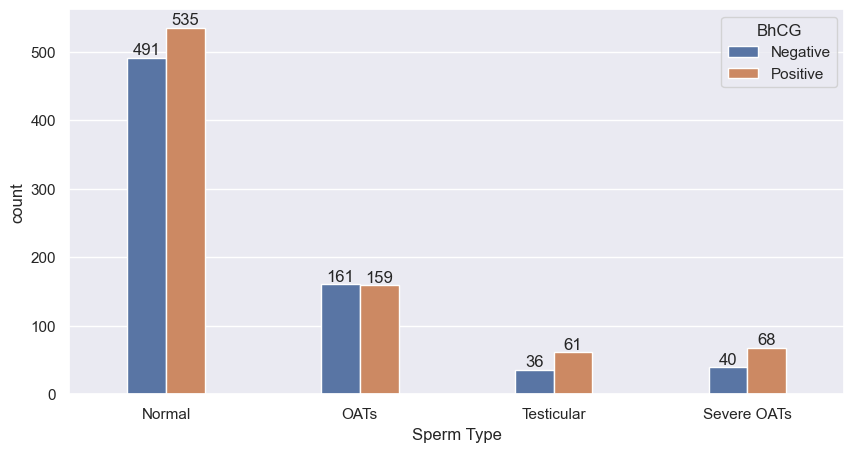

In [21]:
ax = sns.countplot(x = 'Sperm Type', data = df, width = 0.4, hue = 'BhCG')

for bars in ax.containers:
    ax.bar_label(bars)

##### ~ For Indication


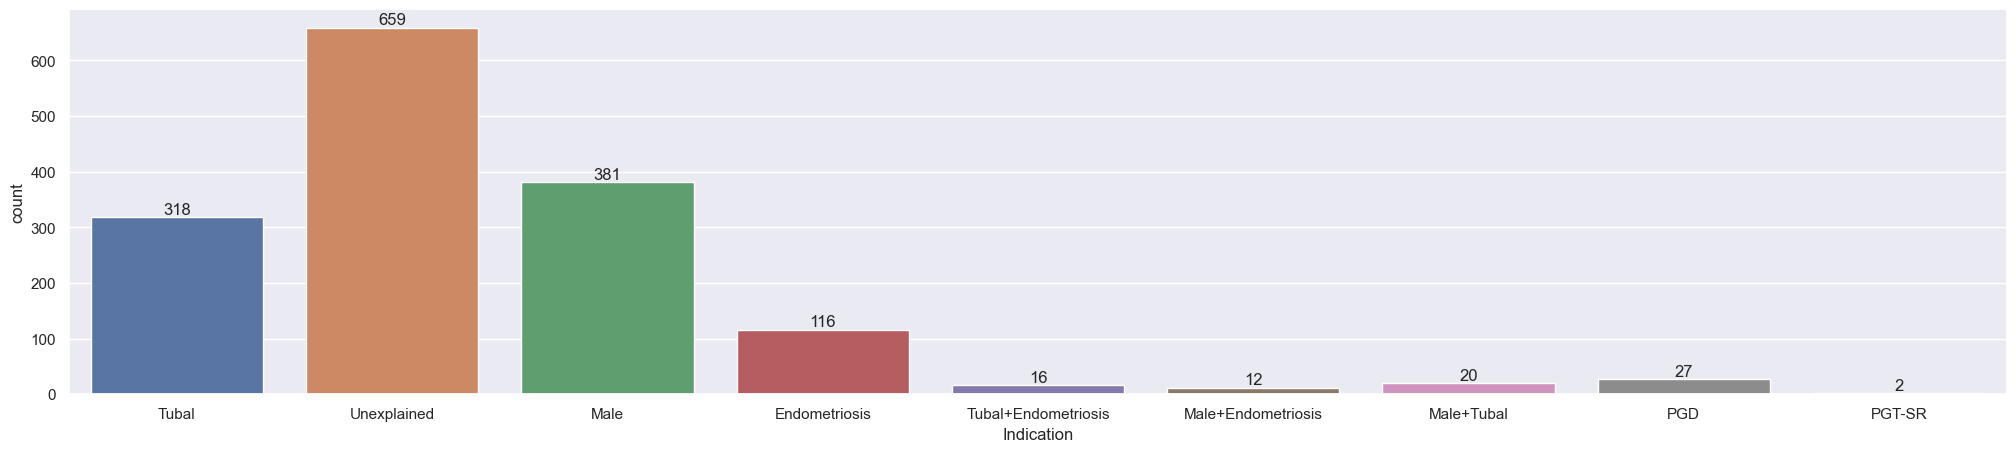

In [23]:
ax = sns.countplot(x = 'Indication', data = df, width = 0.8)
sns.set(rc={'figure.figsize':(25,5)})
for bars in ax.containers:
    ax.bar_label(bars)

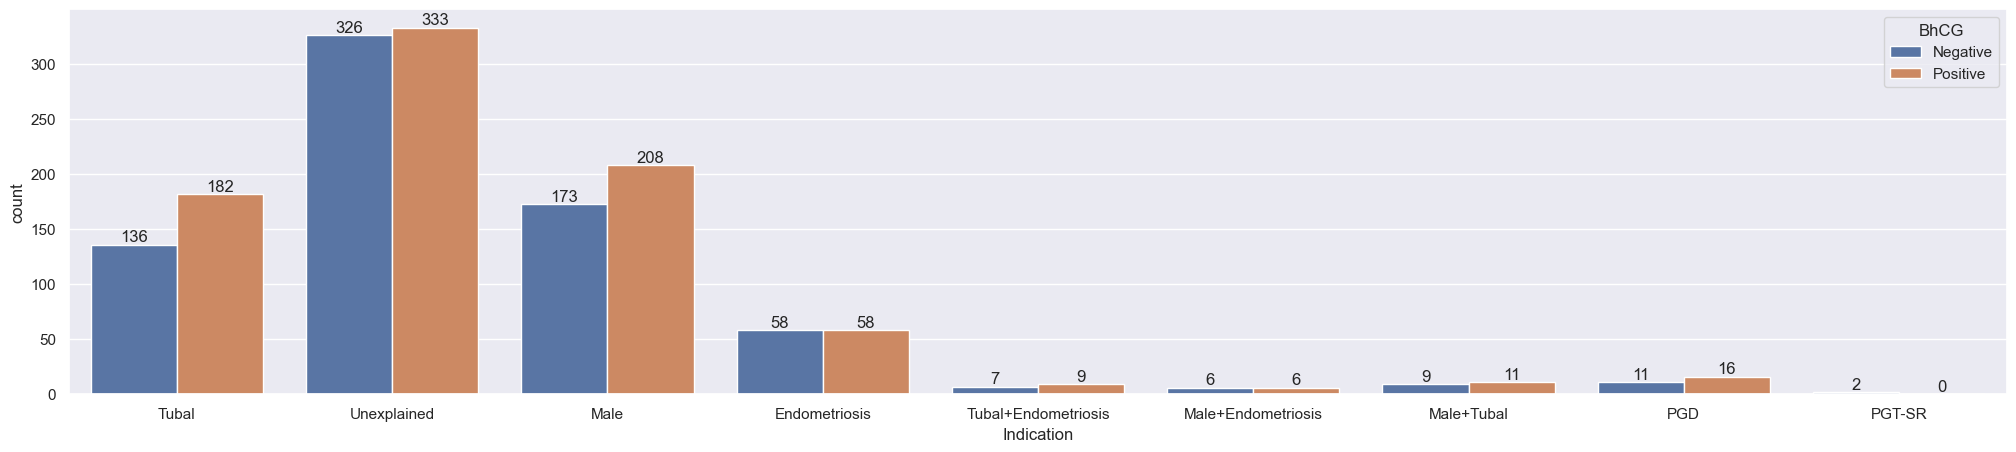

In [24]:
ax = sns.countplot(x = 'Indication', data = df, width = 0.8, hue = 'BhCG')
sns.set(rc={'figure.figsize':(25,5)})

for bars in ax.containers:
    ax.bar_label(bars)

### Pie Chart for Data Distribution
##### ~ For BhCG

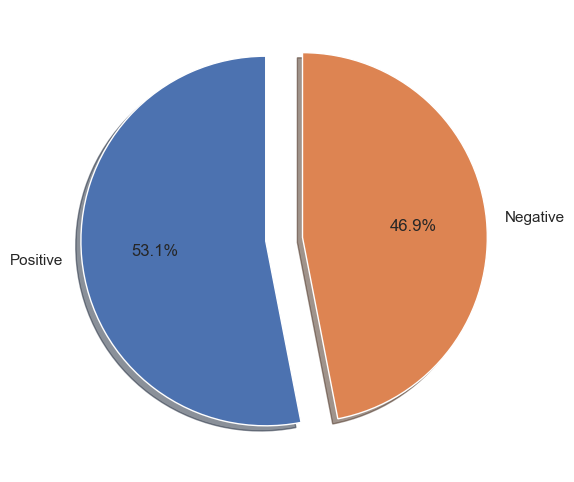

In [25]:
# Count the values in the 'BhCG' column
data_dr = df['BhCG'].value_counts()

# Extract the labels and counts
labels = data_dr.index.tolist()
counts = data_dr.values.tolist()

# Create a pie chart
plt.pie(counts, labels=labels, shadow=True, explode=(0.0, 0.2), autopct='%1.1f%%', startangle=90)

# Set the figure size
plt.gcf().set_size_inches(12, 6)

# Show the pie chart
plt.show()

### Creating Pair Plots using Seaborn
Creating pair plots using Seaborn is a powerful way to visualize relationships between multiple variables in your dataset. A pair plot displays scatterplots for all pairs of numeric variables and histograms for the diagonal (when the variable is compared with itself).

*Here we are assigning the value **1-BhCG Positive** and **0-BhCG Negative** which will help us in better understanding of the data correlation.*

In [26]:
# Map values in BhCG column, 0 representing Negative  and 1 represeting Positive 
df['BhCG'] = df['BhCG'].map({'Negative': 0, 'Positive': 1})

# Columns which we want to be included in a new DataFrame named as data_for_corr
data_for_corr = df[['Age ', 'Cycle', 'Infertility Type', 'Duration of Infertility',
       'AMH ', ' Eggs', 'Embryo Transfer', 'Indication', 'Sperm Type', 'BMI',
       'BhCG']]

# Displaying our new DataFrame
data_for_corr.head()

,Age,Cycle,Infertility Type,Duration of Infertility,AMH,Eggs,Embryo Transfer,Indication,Sperm Type,BMI,BhCG
0,27.0,1,2,1.0,3.14,10,OnlyFreshcycle,Tubal,Normal,29.30,0
1,33.0,1,1,3.0,16.85,26,OnlyFET,Unexplained,Normal,28.91,1
2,36.0,1,1,1.0,0.56,12,OnlyFreshcycle,Unexplained,Normal,28.16,0
3,37.0,1,1,7.0,1.30,3,OnlyFreshcycle,Male,OATs,26.42,0
4,27.0,1,1,3.0,3.56,17,Freshcycle_and_FET,Tubal,Normal,24.00,0


*Note- Here you can see that the values for BhCG have been converted into Binary for Pair Plots*

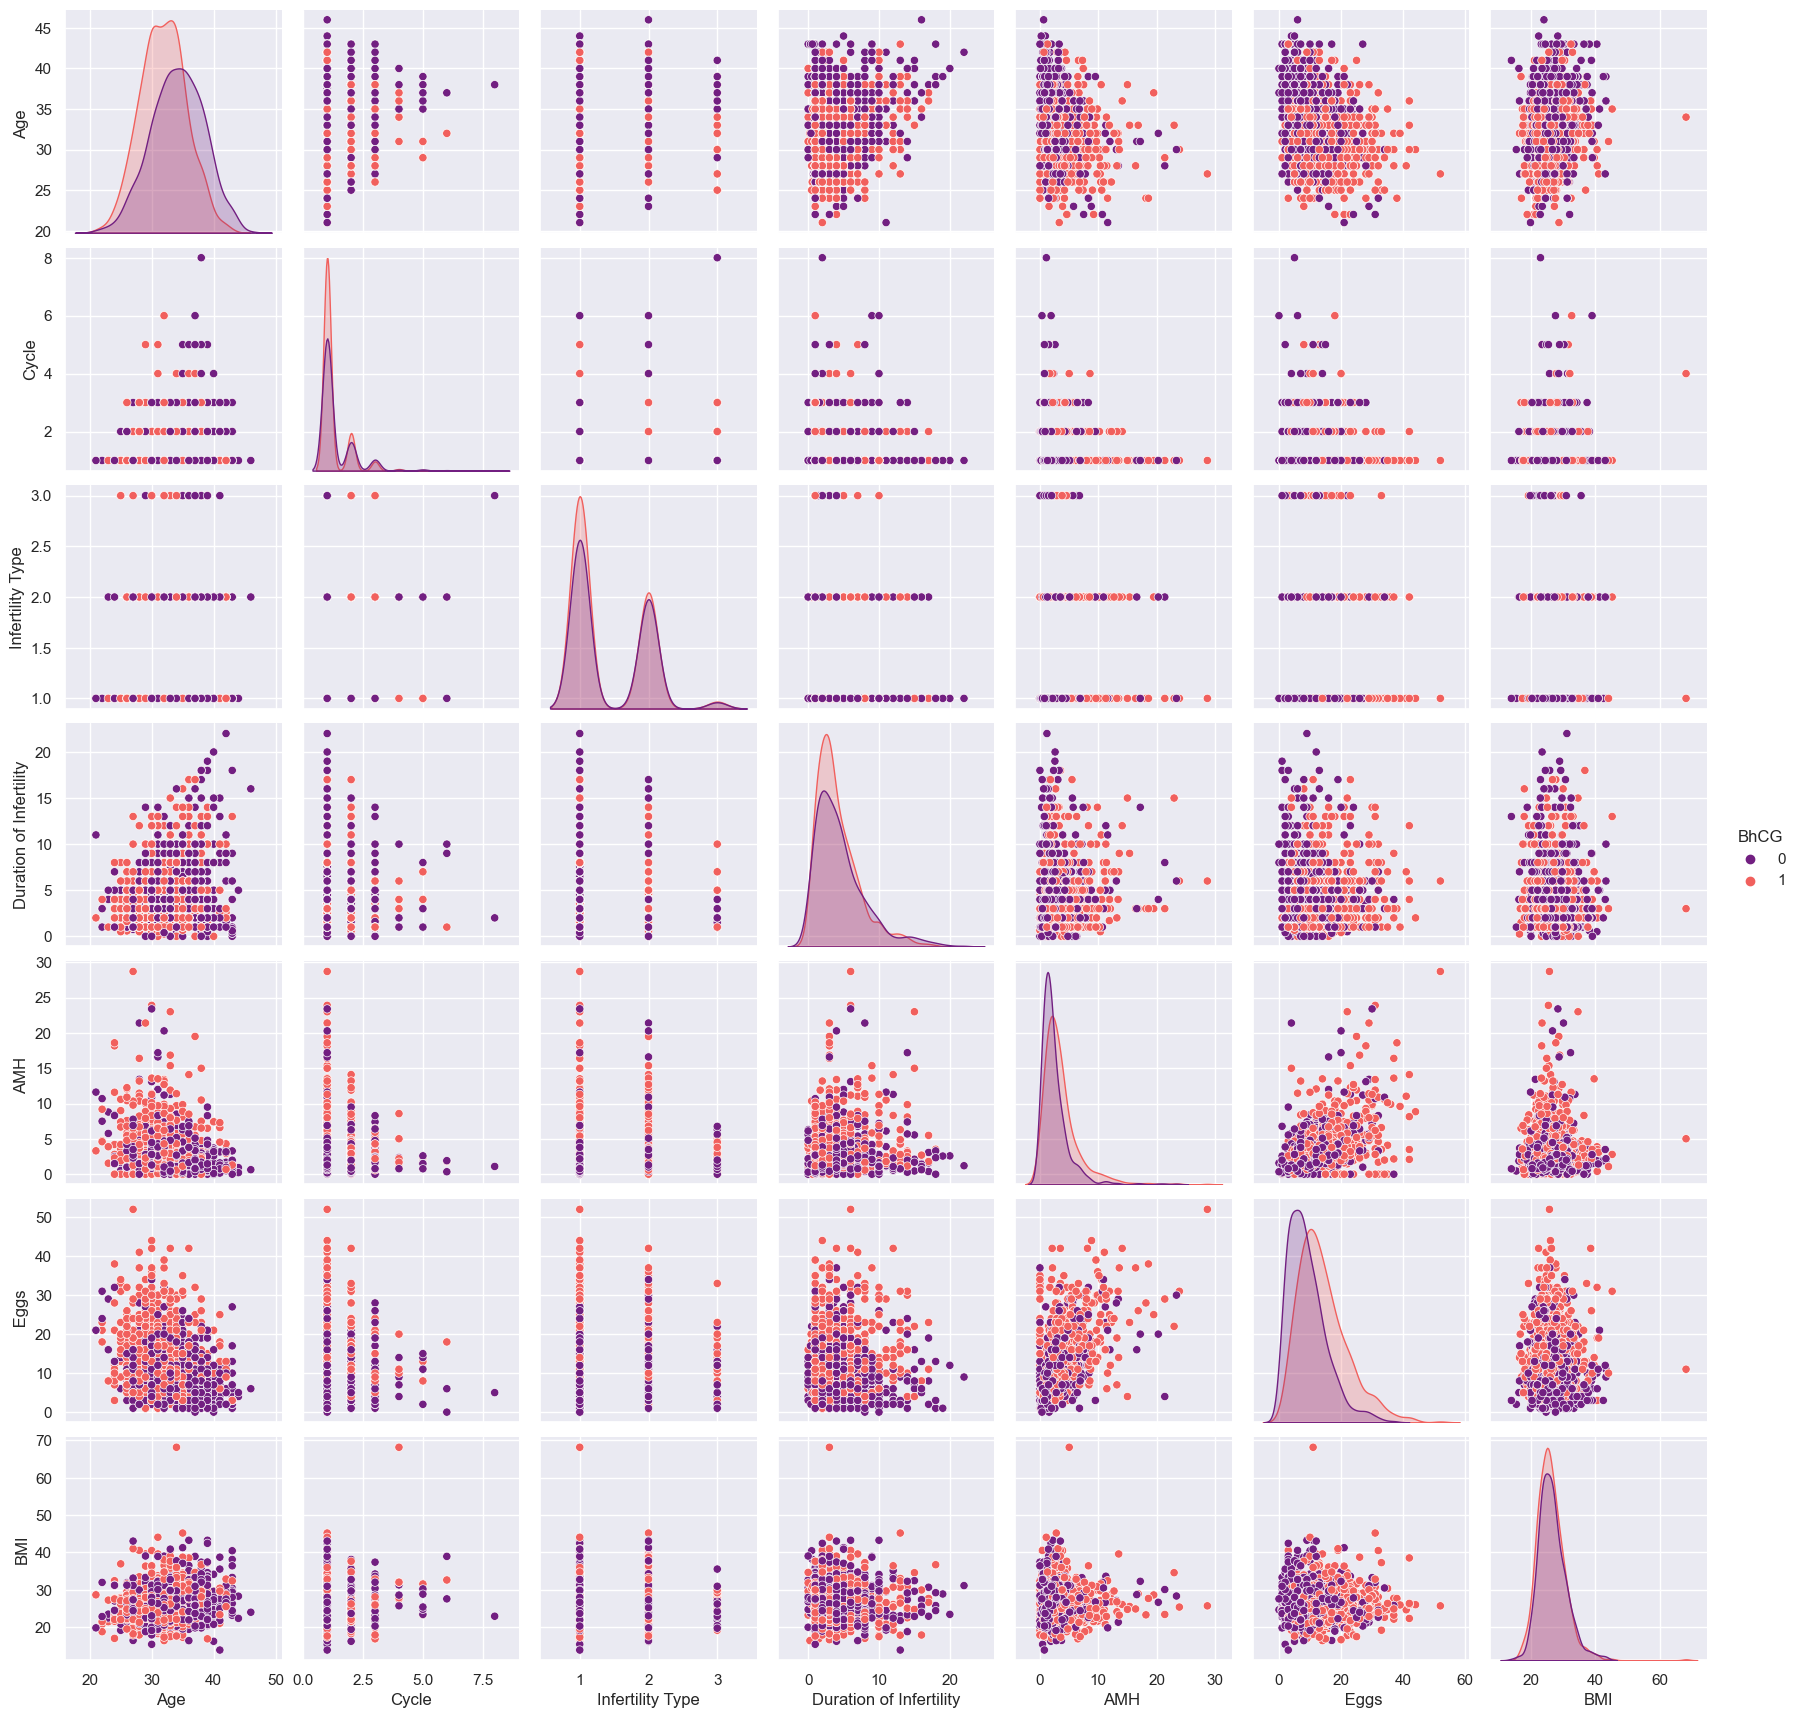

In [27]:
"""
Creating Pairplot from Seaborn to see relationship between individual features and BhCG
"""
sns.pairplot(data_for_corr, palette='magma',hue= 'BhCG')

With above pair plots, we can can compare as analyze the data variation & distribution with each attribute. This gives us a better understanding of our dataset and its relation & dependency among other attributes.

*Note- Here 3 Columns namely Embryo Transfer, Sperm Type and Indication have not been plotted since they were Object data types and it only accepts Numeric values. We'll use above 3 attributes later for correlation analysis*

Now, we will assign **BhCG** as our target column as we want to perform data analysis around it.

In [28]:
y_target = df.BhCG

Dropping 2 columns from the dataframe df - *Date and BhCG* and naming the new dataframe as 'data'

In [29]:
df.columns

Index(['Date', 'Age ', 'Cycle', 'Infertility Type', 'Duration of Infertility',
       'AMH ', ' Eggs', 'Embryo Transfer', 'Indication', 'Sperm Type', 'BMI',
       'BhCG'],
      dtype='object')

In [30]:
list = ['Date','BhCG']
data = df.drop(list,axis=1)

In [31]:
data.columns

Index(['Age ', 'Cycle', 'Infertility Type', 'Duration of Infertility', 'AMH ',
       ' Eggs', 'Embryo Transfer', 'Indication', 'Sperm Type', 'BMI'],
      dtype='object')

In [32]:
data.head()

,Age,Cycle,Infertility Type,Duration of Infertility,AMH,Eggs,Embryo Transfer,Indication,Sperm Type,BMI
0,27.0,1,2,1.0,3.14,10,OnlyFreshcycle,Tubal,Normal,29.30
1,33.0,1,1,3.0,16.85,26,OnlyFET,Unexplained,Normal,28.91
2,36.0,1,1,1.0,0.56,12,OnlyFreshcycle,Unexplained,Normal,28.16
3,37.0,1,1,7.0,1.30,3,OnlyFreshcycle,Male,OATs,26.42
4,27.0,1,1,3.0,3.56,17,Freshcycle_and_FET,Tubal,Normal,24.00


*Note- Date and BhCG have been removed from this DataFrame*

### Violin Plots for Data Visualization
Violin plots are a type of data visualization that combines aspects of box plots and kernel density plots. They are particularly useful for visualizing the distribution of data across different categories or groups.

Now we will be assigning Numeric values to our 3 columns:
- Emryo Transfer
- Indication
- Sperm Type

In [33]:
# For Sperm Type
data['Sperm Type'] = data['Sperm Type'].map({'Normal': 1, 'OATs': 2, 'Testicular': 3, 'Severe OATs': 4})

# For Embryo Transfer
data['Embryo Transfer'] = data['Embryo Transfer'].map({'OnlyFreshcycle': 1, 'OnlyFET': 2, 'Freshcycle_and_FET': 3})

# For Indication
data['Indication'] = data['Indication'].map({'Tubal': 1, 'Unexplained': 2, 'Male': 3, 'Endometriosis': 4, 
                    'Tubal+Endometriosis': 5, 'Male+Endometriosis': 6, 'Male+Tubal': 7, 'PGD': 8, 'PGT-SR': 9})

Here we have a breakdown of our code and techniques we will be using for plotting violin plot:
1. **Data Normalization:** The original data (data) is first normalized using the formula (data - data.mean()) / (data.std()). This standardization ensures that the data have a mean of 0 and a standard deviation of 1.
2. **Feature Selection:** It selects the first 10 columns of the normalized data for visualization. These are presumably the features you want to compare.
3. **Data Transformation:** The data is then transformed into a long format using pd.melt(). This transformation is often performed to prepare data for visualization. It creates a DataFrame with columns 'BhCG', 'features', and 'value', where 'features' represent the feature names, 'value' represents the corresponding values, and 'BhCG' represents the target variable.
4. **Creating the Violin Plot:** Finally, a violin plot is created using Seaborn (sns.violinplot()). This plot compares the distribution of 'value' (feature values) across different 'features', splitting the violins based on the 'BhCG' values. The inner quartiles are shown, and the 'magma' color palette is used.
5. **Customization:** The plt.figure(figsize=(20, 10)) line sets the figure size, and plt.xticks(rotation=45) rotates the x-axis labels for better readability.

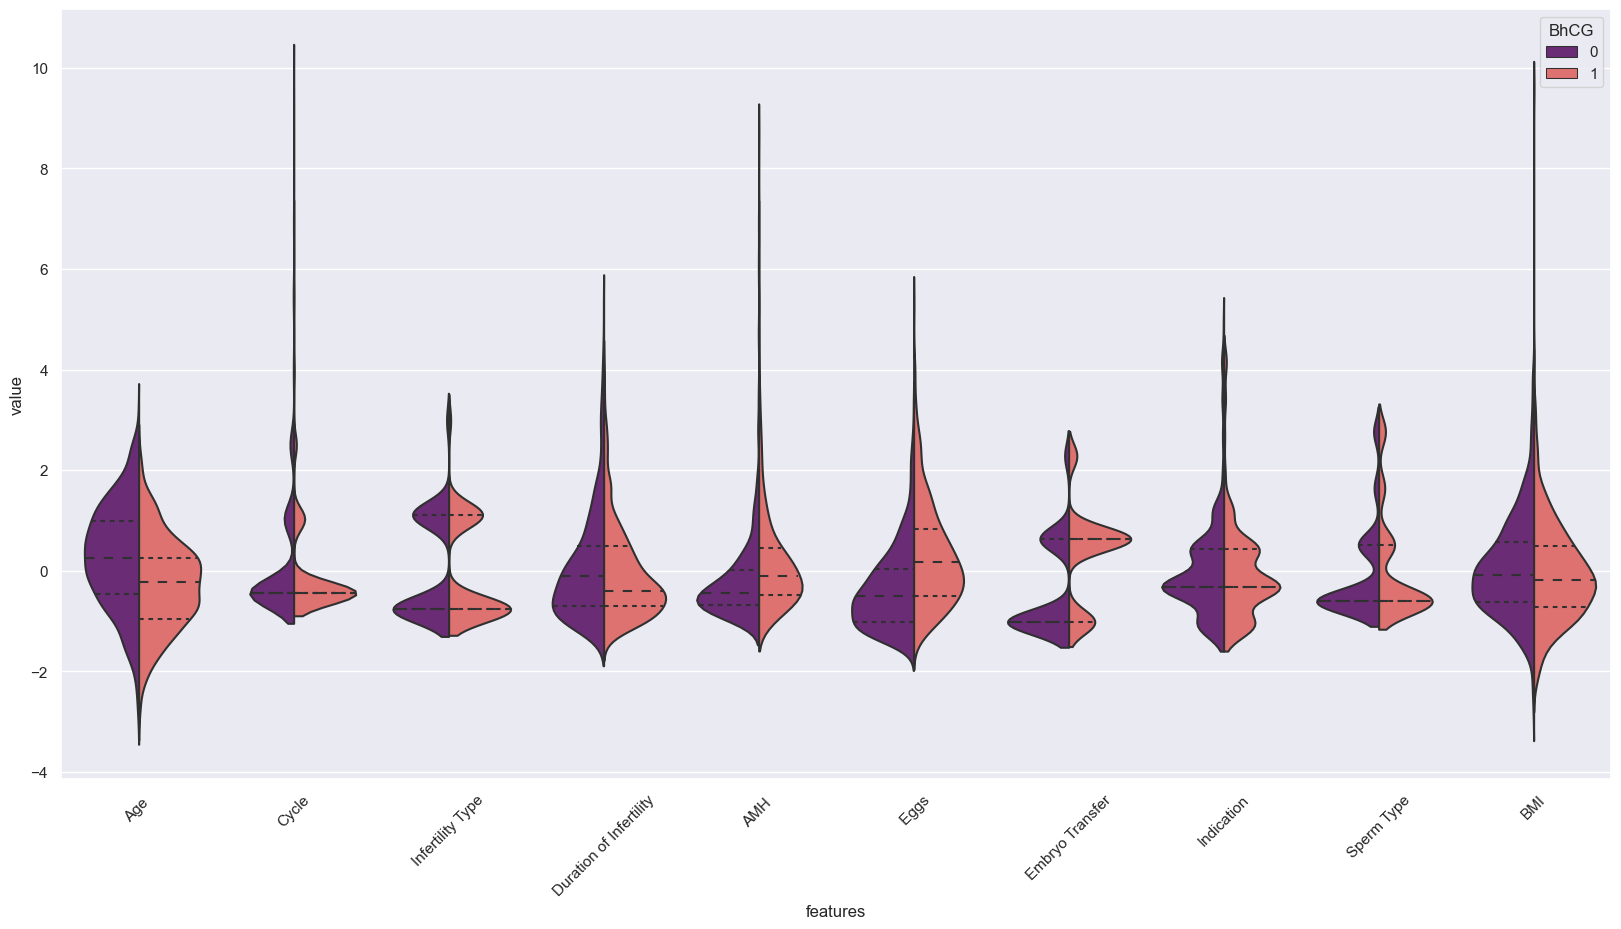

In [34]:
# --pandas--
x_features = data
data_n = (data - data.mean()) / (data.std())  # data normalization for plotting

# Get all the features -- since axis = 1, Columnwise Concatenation
data_vis = pd.concat([y_target, data_n.iloc[:,0:10]], axis=1)

# let's flat the dataset
# `pd.melt` -- Unpivot the given DataFrame from wide format to long format 
# It Massages a DataFrame into a right format
data_vis = pd.melt(data_vis, id_vars="BhCG",
                    var_name="features",
                    value_name='value')
# --matplotlib--
plt.figure(figsize=(20,10))

# --seaborn--
sns.violinplot(x = "features",
               y = "value",
               hue = "BhCG",
               data = data_vis,
               split = True, 
               inner = "quart",
               palette = "magma"
               )

# --matplotlib--
plt.xticks(rotation=45);

### Box Plots as an Alternate Method
The box plot is a useful visualization for comparing the central tendency and spread of data between different categories or groups.

*Description for creating Box Plots:*
1. **Setting Figure Size:** The plt.figure(figsize=(20, 10)) line sets the figure size to 20 units in width and 10 units in height, making it larger and more readable.
2. **Creating the Box Plot:** The sns.boxplot() function is used to create the box plot. It compares the distribution of 'value' for different 'features' and splits the boxes based on the 'BhCG' values.
- x="features" specifies that the 'features' column contains the x-axis labels (the features you want to compare).
- y="value" specifies that the 'value' column contains the y-axis values (the feature values).
- hue="BhCG" specifies that the 'BhCG' column determines the color of the boxes (presumably 'Negative' and 'Positive').
- data=data_vis specifies the DataFrame containing the data in long format.
- palette="dark:salmon_r" sets the color palette for the boxes.
3. **X-Axis Label Rotation:** plt.xticks(rotation=45) rotates the x-axis labels by 45 degrees for better readability, especially when feature names are long.

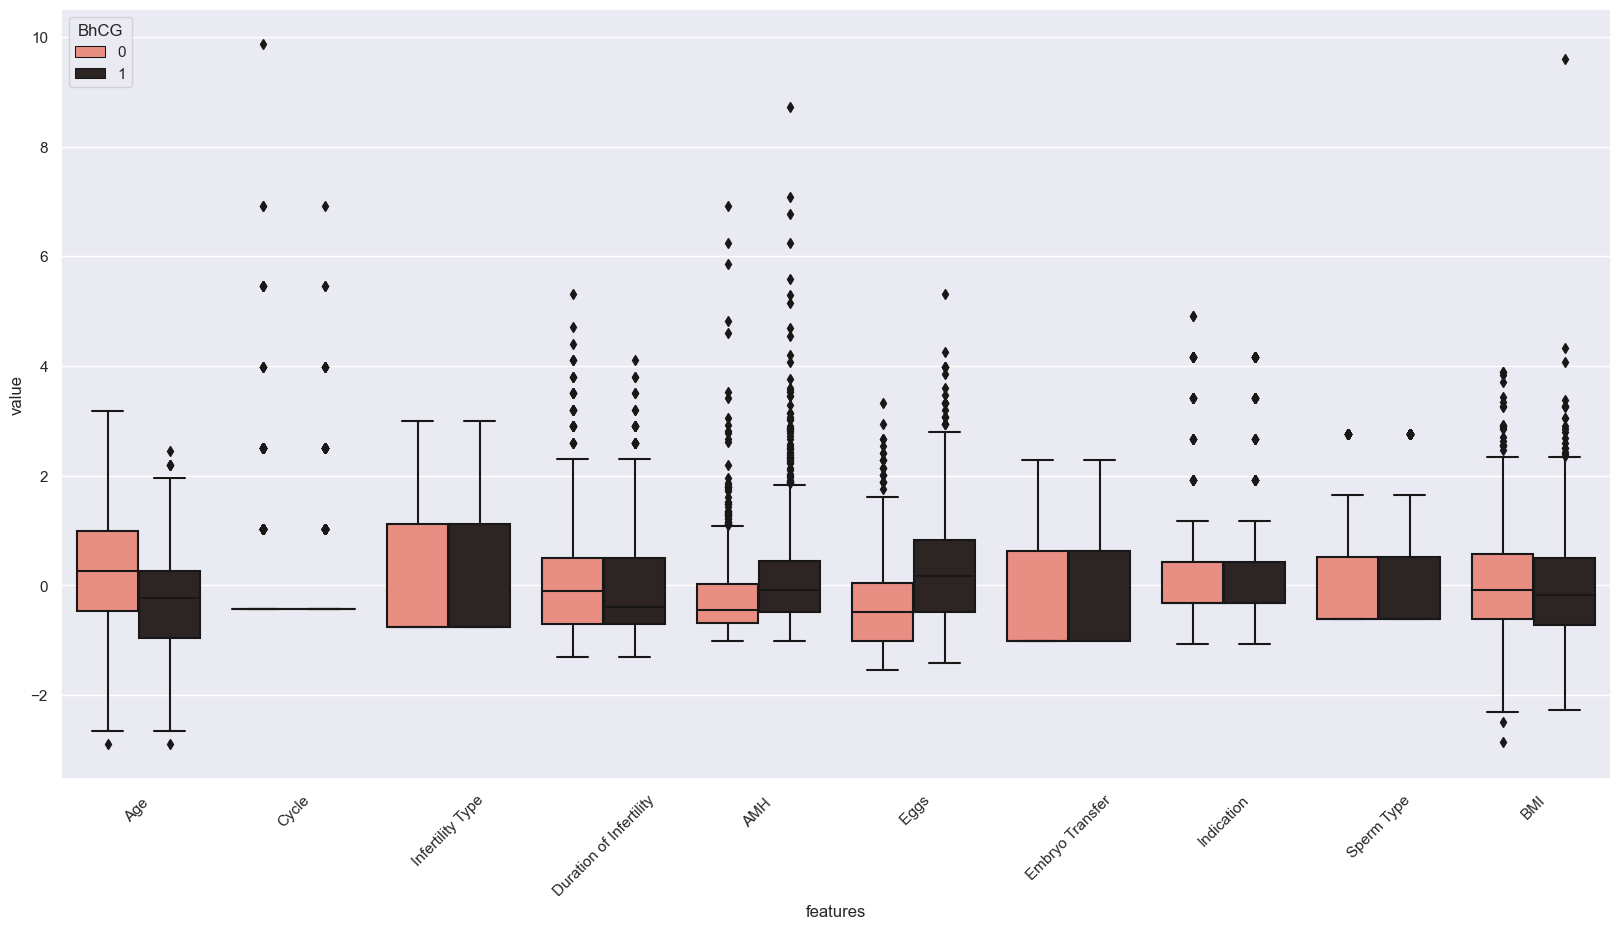

In [35]:
plt.figure(figsize=(20,10))
sns.boxplot(x="features",
            y="value",
            hue="BhCG",
            data=data_vis,
           palette= "dark:salmon_r")

plt.xticks(rotation=45);

### Uncovering Correlated Features with Pair Grids
We will be pairing *BMI, Eggs and AMH* using pair grids for their correlation in the dataframe
1. **sns.set(style="white"):** This line sets the style of the Seaborn plots to "white," which is one of Seaborn's built-in styles for a white background with minimal grid lines.
2. **df = x_features.loc[:,['AMH ',' Eggs','BMI']]:** This line creates a new DataFrame df containing only three columns from x_features: 'AMH', 'Eggs', and 'BMI'.
3. **g = sns.PairGrid(df, diag_sharey=False):** This line creates a PairGrid object g using the DataFrame df. diag_sharey=False means that the histograms on the diagonal axes will not share a common y-axis.
4. **g.map_lower(sns.kdeplot, cmap="Blues_d"):** This line maps a lower triangle of the PairGrid. It uses sns.kdeplot to create bivariate kernel density estimate plots (KDEs) with a blue color map (cmap="Blues_d"). These KDE plots show the joint distribution of pairs of variables.
5. **g.map_upper(plt.scatter):** This line maps the upper triangle of the PairGrid. It uses plt.scatter to create scatter plots between pairs of variables. The upper triangle typically displays the same information as the lower triangle but in a different visual form.
6. **g.map_diag(sns.kdeplot, lw=3):** This line maps the diagonal of the PairGrid. It uses sns.kdeplot to create univariate kernel density estimate plots (KDEs) on the diagonal axes. The lw=3 parameter sets the line width of the KDE curves to 3 for better visibility.

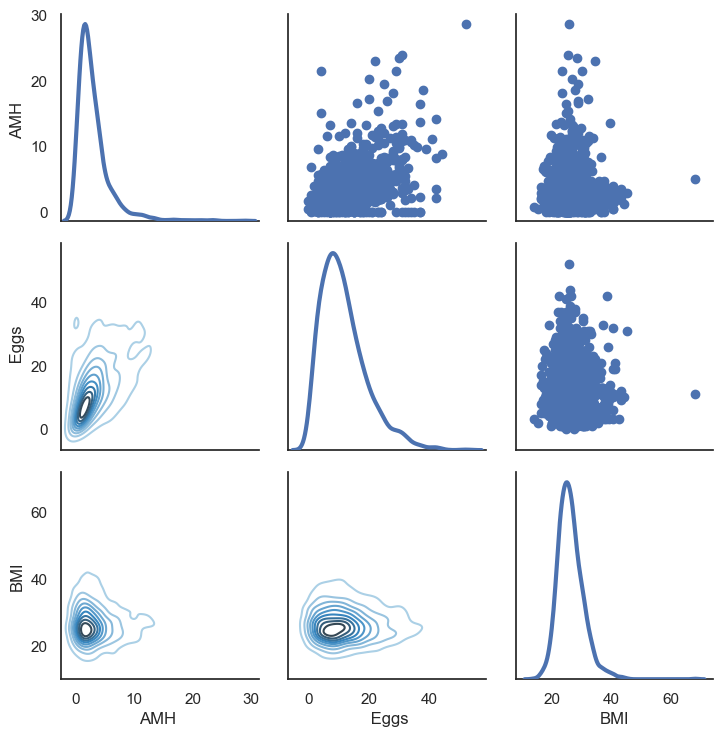

In [36]:
sns.set(style="white")
df = x_features.loc[:,['AMH ',' Eggs','BMI']]
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3);

### Observing all Pair-wise Correlations using Heat Maps
***Q How can one interpret a heat map plot?***
- Each square shows the correlation between the variables on each axis. Correlation ranges from -1 to +1.
- Values closer to zero means there is no linear trend between the two variables.
- The close to 1 the correlation is the more positively correlated they are; that is as one increases so does the other and the closer to 1 the stronger this relationship is.
- A correlation closer to -1 is similar, but instead of both increasing one variable will decrease as the other increases.
- The diagonals are all 1 because those squares are correlating each variable to itself (so it's a perfect correlation).
- For the rest the larger the number and darker the color the higher the correlation between the two variables. The plot is also symmetrical about the diagonal since the same two variables are being paired together in those squares.

***Code Breakdown***
1. **f, ax = plt.subplots(figsize=(18, 18)):** This line creates a Matplotlib figure (f) and axis (ax) objects with a specified figsize (18 inches by 18 inches), determining the size of the heatmap.
2. **sns.heatmap(x_features.corr(), annot=True, linewidths=.5, fmt='.1f', ax=ax):** This line creates the heatmap using Seaborn's heatmap() function. Here's what each parameter does:
- *x_features.corr()*: This part calculates the correlation matrix of the x_features DataFrame. It contains correlation coefficients between all pairs of numeric columns.
- *annot=True*: This parameter adds annotation (numeric values) to each cell in the heatmap, displaying the actual correlation coefficients.
- *linewidths=.5*: It sets the width of the lines that separate each cell in the heatmap.
- *fmt='.1f'*: This parameter specifies the format of the annotation values. Here, .1f indicates that the values should be displayed with one decimal place.
- *ax=ax*: It assigns the created Matplotlib axis (ax) to the heatmap, ensuring that it's plotted within the specified figure.

<Axes: >

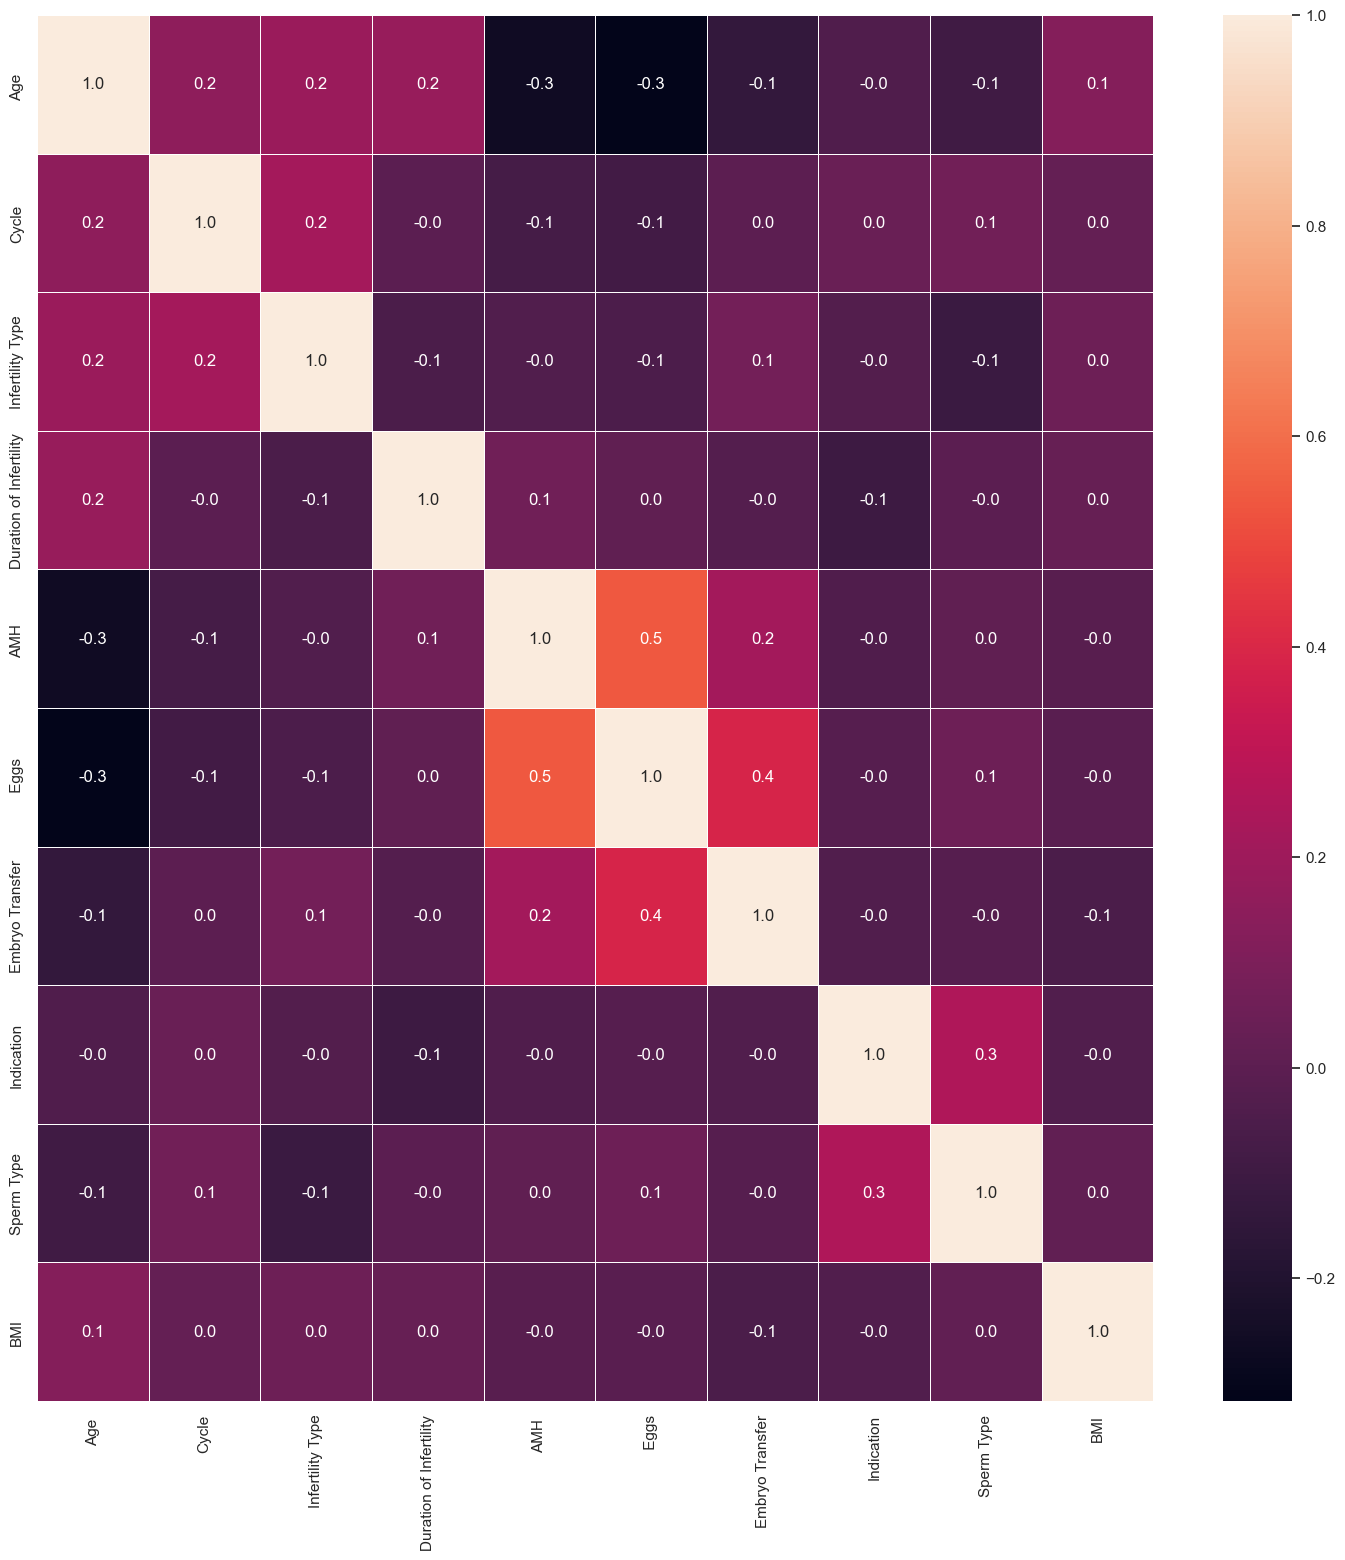

In [37]:
# Pair-wise correlation across all the varible
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(x_features.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

***White Cell - Highly Correlated***

***Black Cell - Non-correlated***

# Machine Learning Alogirthms (ML)
Machine Learning (ML) is a subset of artificial intelligence (AI) that focuses on the development of algorithms and statistical models that enable computer systems to improve their performance on a specific task through learning from data, without being explicitly programmed.

Machine learning algorithms play a significant role in predictive modeling in healthcare and fertility-related applications. These algorithms leverage data to make predictions, improve patient outcomes, and optimize healthcare processes.

For our study, we wil be using 5 different ML algorithms:
- Logistic Regression
- K-Nearest Neighbour (KNN)
- Decision Tree
- Naive Bayes
- Support Vector Machines (SVM)

### Importing libraries

In [38]:
# For dealing with DataFrame
import pandas as pd

# For splitting Data into Test and Train
from sklearn.model_selection import train_test_split

# To generate the classification report and confusion matrix based on model performance
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# For visualization
import seaborn as sns
import matplotlib.pyplot as plt

### Loading dataset into DataFrame


In [39]:
df = pd.read_csv(r'C:\Users\kesha\Desktop\project P\r1551_c11_ivf_dataset_year181920.csv')

In [40]:
df.shape

(1551, 12)

In [41]:
df.head()

,Date,Age,Cycle,Infertility Type,Duration of Infertility,AMH,Eggs,Embryo Transfer,Indication,Sperm Type,BMI,BhCG
0,01-01-2018,27.0,1,2,1.0,3.14,10,OnlyFreshcycle,Tubal,Normal,29.30,Negative
1,01-01-2018,33.0,1,1,3.0,16.85,26,OnlyFET,Unexplained,Normal,28.91,Positive
2,01-01-2018,36.0,1,1,1.0,0.56,12,OnlyFreshcycle,Unexplained,Normal,28.16,Negative
3,01-01-2018,37.0,1,1,7.0,1.30,3,OnlyFreshcycle,Male,OATs,26.42,Negative
4,01-01-2018,27.0,1,1,3.0,3.56,17,Freshcycle_and_FET,Tubal,Normal,24.00,Negative


### Data Preprocessing & Feature Engineering
This will include:
- Assining Numeric values to the column Embryo Transfer, Indication & Sperm Type.
- Dropping the Date column.
- Converting BhCG into Binary Values.

In [42]:
df['Sperm Type'] = df['Sperm Type'].map({'Normal': 1, 'OATs': 2, 'Testicular': 3, 'Severe OATs': 4})
df['Embryo Transfer'] = df['Embryo Transfer'].map({'OnlyFreshcycle': 1, 'OnlyFET': 2, 'Freshcycle_and_FET': 3})
df['Indication'] = df['Indication'].map({'Tubal': 1, 'Unexplained': 2, 'Male': 3, 'Endometriosis': 4, 
                    'Tubal+Endometriosis': 5, 'Male+Endometriosis': 6, 'Male+Tubal': 7, 'PGD': 8, 'PGT-SR': 9})

In [43]:
df.drop(['Date'],axis=1,inplace=True)

In [44]:
df.BhCG = [1 if each == 'Positive' else 0 for each in df.BhCG]

In [45]:
# Counting the no. of positive and negative values
df.BhCG.value_counts()

1    823
0    728
Name: BhCG, dtype: int64

In [46]:
df.columns

Index(['Age ', 'Cycle', 'Infertility Type', 'Duration of Infertility', 'AMH ',
       ' Eggs', 'Embryo Transfer', 'Indication', 'Sperm Type', 'BMI', 'BhCG'],
      dtype='object')

In [47]:
df.head()

,Age,Cycle,Infertility Type,Duration of Infertility,AMH,Eggs,Embryo Transfer,Indication,Sperm Type,BMI,BhCG
0,27.0,1,2,1.0,3.14,10,1,1,1,29.30,0
1,33.0,1,1,3.0,16.85,26,2,2,1,28.91,1
2,36.0,1,1,1.0,0.56,12,1,2,1,28.16,0
3,37.0,1,1,7.0,1.30,3,1,3,2,26.42,0
4,27.0,1,1,3.0,3.56,17,3,1,1,24.00,0


*This is the DataFrame which we will be using for ML model.*

### Data Splitting
Splitting data is a crucial step in building machine learning models because it enables model evaluation, prevents overfitting, facilitates hyperparameter tuning, helps assess model bias and variance, checks data quality, and aids in model selection. It ensures that our model is robust and capable of making accurate predictions on new, unseen data.

In [48]:
# We should assign x and y values for test-train datas split.
y = df.BhCG.values
x_data = df.drop(['BhCG'],axis=1)

In [49]:
# See our values
y

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [50]:
# See our values
x_data.head()

,Age,Cycle,Infertility Type,Duration of Infertility,AMH,Eggs,Embryo Transfer,Indication,Sperm Type,BMI
0,27.0,1,2,1.0,3.14,10,1,1,1,29.30
1,33.0,1,1,3.0,16.85,26,2,2,1,28.91
2,36.0,1,1,1.0,0.56,12,1,2,1,28.16
3,37.0,1,1,7.0,1.30,3,1,3,2,26.42
4,27.0,1,1,3.0,3.56,17,3,1,1,24.00


##### ~ Normalizing the data

In [51]:
# Normalization: Normalization means all of the values of data, scale between 0 and 1.
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
x = scaler.fit_transform(x_data)

We are using the **Min-Max scaling** technique to normalize our data using the MinMaxScaler from scikit-learn. This is a common preprocessing step in machine learning, especially when working with algorithms that are sensitive to the scale of input features.
1. Importing the *MinMaxScaler* class from *sklearn.preprocessing*.
2. Creating an instance of the scaler, specifying the desired feature range as (0, 1) using the *feature_range parameter.*
3. Then we use the *fit_transform* method of the scaler to transform our data *x_data* and store the scaled values in the variable x.

After running this code, the x variable will contain our data with each feature scaled to the range [0, 1]. This scaling ensures that our model is less sensitive to the magnitude of the input features, which can lead to better model performance in many cases. However, it's essential to note that normalization should be performed on the training data, and the same scaling parameters (e.g., mean and standard deviation for standardization or min and max values for Min-Max scaling) should be applied to the testing or validation data to maintain consistency.

In [52]:
x

array([[0.24      , 0.        , 0.5       , ..., 0.        , 0.        ,
        0.28389831],
       [0.48      , 0.        , 0.        , ..., 0.125     , 0.        ,
        0.27671334],
       [0.6       , 0.        , 0.        , ..., 0.125     , 0.        ,
        0.26289609],
       ...,
       [0.24      , 0.        , 0.        , ..., 0.25      , 0.33333333,
        0.19436256],
       [0.64      , 0.14285714, 0.        , ..., 0.375     , 0.        ,
        0.18036109],
       [0.64      , 0.28571429, 0.        , ..., 0.125     , 0.        ,
        0.11827561]])

##### ~ Test - Train Split
Now we are ready to split our data into training and testing sets using scikit-learn's train_test_split function. This is a common step in preparing our data for machine learning modeling. Here's what each part of our code does:
1. **Data Splitting:** We import the train_test_split function from sklearn.model_selection. Then, we use this function to split your x and y data into training and testing sets. Here's a breakdown of what's happening:
- x_train and y_train will contain the training data for our features (x) and labels (y), respectively.
- x_test and y_test will contain the testing data for our features and labels.
- The test_size parameter is set to 0.2, which means that 20% of your data will be allocated for testing, and the remaining 80% will be used for training.
- The random_state parameter is set to 42, which ensures that the data splitting is reproducible. Using the same random_state value will give you the same train-test split every time we run the code.
2. **Lists for Method Evaluation:** We've initialized two empty lists, method_names and method_scores. These lists are intended to store the names of different methods or models we'll use for our machine learning task and their corresponding evaluation 

In [53]:
# We are ready to split datas as train and test.
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

# 20% data will assign as 'Test Data'
method_names=[] # In Conclusion part, we'll try to show you which method gave the best result.
method_scores=[]

After splitting our data and setting up these lists, we can proceed with training and evaluating various machine learning models on the training data and use the testing data for evaluation. The method_names and method_scores lists will help us compare the results and determine which method or model works best for our specific task.

In [54]:
# Let's look at new values.
x_train

array([[0.4       , 0.        , 0.        , ..., 0.125     , 0.        ,
        0.16046426],
       [0.4       , 0.28571429, 0.        , ..., 0.375     , 0.33333333,
        0.23544584],
       [0.24      , 0.        , 0.        , ..., 0.        , 0.        ,
        0.07977155],
       ...,
       [0.56      , 0.        , 0.5       , ..., 0.375     , 0.        ,
        0.23489315],
       [0.48      , 0.14285714, 0.5       , ..., 0.125     , 0.        ,
        0.28352985],
       [0.36      , 0.        , 0.        , ..., 0.125     , 0.        ,
        0.22126013]])

### Application of ML Algorithms
#### 1) Logistic Regression
Logistic Regression is a fundamental and interpretable algorithm used for binary classification tasks when we want to estimate the probability of an input belonging to a particular class. It's a valuable tool in the machine learning and statistical modeling toolkit.

*Code Breakdown for Logistic Regression Model Building:*
1. **Logistic Regression Model:** We import the LogisticRegression class from sklearn.linear_model. Then, we create an instance of the logistic regression model called log_reg.
2. **Model Training:** We fit the logistic regression model to our training data (x_train and y_train) using the fit method. This step involves finding the optimal weights and bias for the model based on our training data.
3. **Model Evaluation:** We calculate and print the test accuracy of the logistic regression model using the score method. This provides an indication of how well our model performs on the testing data.
4. **Confusion Matrix:** We use scikit-learn's confusion_matrix function to calculate the confusion matrix for the model's predictions on the testing data. The confusion matrix provides a detailed breakdown of true positive, true negative, false positive, and false negative predictions.
5. **Visualization of Confusion Matrix:** We create a heatmap to visualize the confusion matrix using the seaborn library. This heatmap helps we visually assess the model's performance in terms of classifying true positives, true negatives, false positives, and false negatives.
6. **Appending Results:** We append the method name ("Logistic Reg.") and the test accuracy score to the method_names and method_scores lists, respectively. This allows us to keep track of the performance of this specific method for later comparison with other methods.

Logistic Regression Classification Test Accuracy 0.7106109324758842


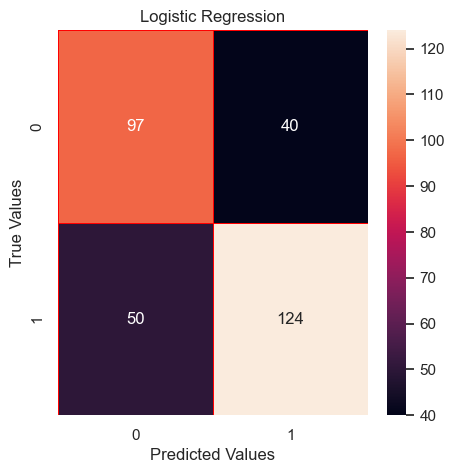

In [55]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()

# Fitting
log_reg.fit(x_train, y_train) 

print("Logistic Regression Classification Test Accuracy {}".format(log_reg.score(x_test,y_test)))

method_names.append("Logistic Reg.")
method_scores.append(log_reg.score(x_test,y_test))

#Confusion Matrix
y_pred = log_reg.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred)

#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.title("Logistic Regression")
plt.show()

- **Accuracy Calculation:** We use the accuracy_score function from scikit-learn to calculate the accuracy of the model's predictions. The accuracy score is a measure of the proportion of correctly predicted instances among all instances in the test set.
- **Classification Report:** We generate a classification report using the classification_report function from scikit-learn. This report provides a detailed breakdown of various classification metrics, including precision, recall, F1-score, and support, for each class in our classification problem.

In [56]:
accuracy = accuracy_score(y_test, y_pred)

classification_report_output = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:\n', classification_report_output)

Accuracy: 0.7106109324758842
Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.71      0.68       137
           1       0.76      0.71      0.73       174

    accuracy                           0.71       311
   macro avg       0.71      0.71      0.71       311
weighted avg       0.71      0.71      0.71       311



#### 2) KNN Classification
K-Nearest Neighbors is a versatile and intuitive algorithm that relies on the similarity of data points to make predictions. It is often used for small to medium-sized datasets and can be a valuable addition to your machine learning toolkit, especially for classification tasks with non-linear decision boundaries.

*Code Breakdown for KNN Classification Model Building:*
1. **KNN Model:** We import the KNeighborsClassifier class from sklearn.neighbors. Then, we create an instance of the KNN classifier called knn. In this case, we've specified n_neighbors=5, meaning the algorithm will consider the 5 nearest neighbors when making predictions.
2. **Model Training:** We fit the KNN model to your training data (x_train and y_train) using the fit method. This step involves building the internal data structures necessary for finding the nearest neighbors during predictions.
3. **Model Evaluation:** We calculate and print the test score of the KNN classifier using the score method. The test score represents the accuracy of the model on the testing data, i.e., the proportion of correctly predicted instances.
4. **Confusion Matrix:** We use scikit-learn's confusion_matrix function to calculate the confusion matrix for the model's predictions on the testing data. The confusion matrix provides a detailed breakdown of true positive, true negative, false positive, and false negative predictions.
5. **Visualization of Confusion Matrix:** We create a heatmap to visualize the confusion matrix using the seaborn library. This heatmap helps us to visually assess the model's performance in terms of classifying true positives, true negatives, false positives, and false negatives.
6. **Appending Results:** We append the method name ("KNN") and the test score to the method_names and method_scores lists, respectively. This allows us to keep track of the performance of this specific method for later comparison with other methods.

Score for Number of Neighbors = 5: 0.6752411575562701


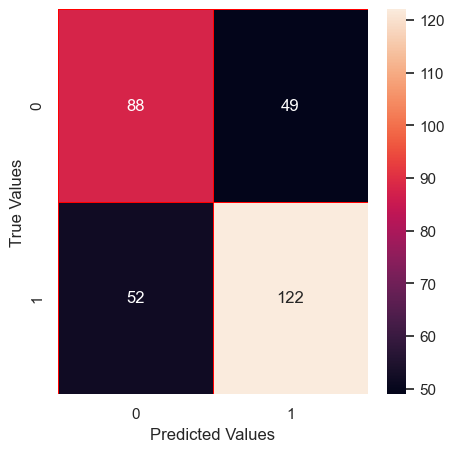

In [57]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)  # 5 is optional.

knn.fit(x_train,y_train)

print("Score for Number of Neighbors = 5: {}".format(knn.score(x_test,y_test)))

method_names.append("KNN")
method_scores.append(knn.score(x_test,y_test))

#Confusion Matrix
y_pred = knn.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred)

#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

In [58]:
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:\n', classification_report_output)

Accuracy: 0.6752411575562701
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.64      0.64       137
           1       0.71      0.70      0.71       174

    accuracy                           0.68       311
   macro avg       0.67      0.67      0.67       311
weighted avg       0.68      0.68      0.68       311



#### 3) Decision Tree
A Decision Tree is a supervised machine learning algorithm that is widely used for both classification and regression tasks. It is a tree-like model of decisions and their possible consequences. They are particularly valuable when you need to understand the decision-making process and feature importance in your data. However, they require careful tuning to prevent overfitting.

*Code Breakdown for Decision Tree Model Building:*
1. **Decision Tree Model:** You import the DecisionTreeClassifier class from sklearn.tree. Then, you create an instance of the Decision Tree Classifier called dec_tree.
2. **Model Training:** You fit the Decision Tree Classifier to your training data (x_train and y_train) using the fit method. This step involves building the decision tree structure based on your training data.
3. **Model Evaluation:** You calculate and print the classification score of the Decision Tree Classifier using the score method. The classification score represents the accuracy of the model on the testing data, indicating the proportion of correctly predicted instances.
4. **Confusion Matrix:** You use scikit-learn's confusion_matrix function to calculate the confusion matrix for the model's predictions on the testing data. The confusion matrix provides a detailed breakdown of true positive, true negative, false positive, and false negative predictions.
5. **Visualization of Confusion Matrix:** You create a heatmap to visualize the confusion matrix using the seaborn library. This heatmap helps you visually assess the model's performance in terms of classifying true positives, true negatives, false positives, and false negatives.
6. **Appending Results:** You append the method name ("Decision Tree") and the classification score to the method_names and method_scores lists, respectively. This allows you to keep track of the performance of this specific method for later comparison with other methods.

Decision Tree Classification Score:  0.639871382636656


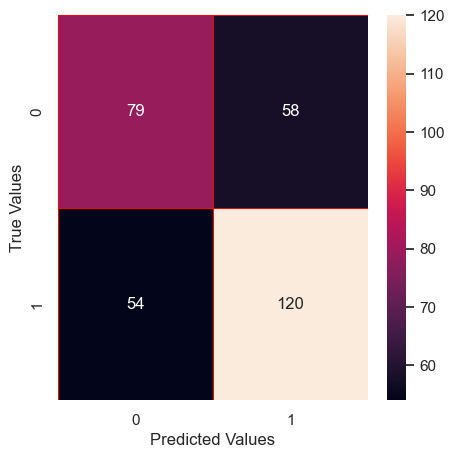

In [59]:
from sklearn.tree import DecisionTreeClassifier

dec_tree = DecisionTreeClassifier()
dec_tree.fit(x_train,y_train)

print("Decision Tree Classification Score: ",dec_tree.score(x_test,y_test))

method_names.append("Decision Tree")
method_scores.append(dec_tree.score(x_test,y_test))

#Confusion Matrix
y_pred = dec_tree.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred)

#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

In [60]:
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:\n', classification_report_output)

Accuracy: 0.639871382636656
Classification Report:
               precision    recall  f1-score   support

           0       0.59      0.58      0.59       137
           1       0.67      0.69      0.68       174

    accuracy                           0.64       311
   macro avg       0.63      0.63      0.63       311
weighted avg       0.64      0.64      0.64       311



#### 4) Naive Bayes
Naive Bayes is a family of probabilistic machine learning algorithms that are based on Bayes' theorem and are used primarily for classification tasks. The "naive" in Naive Bayes comes from the assumption of feature independence, which simplifies the modeling process. However, their performance can be limited when the independence assumption doesn't hold, and they are best suited for tasks where the assumption is reasonable or when a simple and interpretable model is desired.

*Code Breakdown for Naive Bayes Model Building:*
1. **Gaussian Naive Bayes Model:** You import the GaussianNB class from sklearn.naive_bayes. Then, you create an instance of the Gaussian Naive Bayes classifier called naive_bayes.
2. **Model Training:** You fit the Gaussian Naive Bayes model to your testing data (x_test and y_test) using the fit method. This step involves estimating probability distributions based on the training data.
3. **Model Evaluation:** You calculate and print the classification score of the Gaussian Naive Bayes classifier using the score method. The classification score represents the accuracy of the model on the testing data, indicating the proportion of correctly predicted instances.
4. **Confusion Matrix:** You use scikit-learn's confusion_matrix function to calculate the confusion matrix for the model's predictions on the testing data. The confusion matrix provides a detailed breakdown of true positive, true negative, false positive, and false negative predictions.
5. **Visualization of Confusion Matrix:** You create a heatmap to visualize the confusion matrix using the seaborn library. This heatmap helps you visually assess the model's performance in terms of classifying true positives, true negatives, false positives, and false negatives.
6. **Appending Results:** You append the method name ("Naive Bayes") and the classification score to the method_names and method_scores lists, respectively. This allows you to keep track of the performance of this specific method for later comparison with other methods.

Naive Bayes Classification Score: 0.7041800643086816


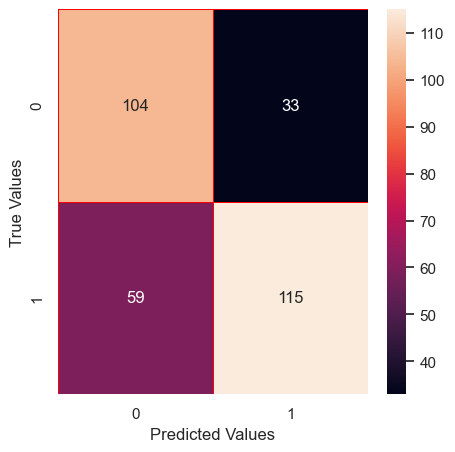

In [61]:
from sklearn.naive_bayes import GaussianNB

naive_bayes = GaussianNB()
naive_bayes.fit(x_test,y_test)

print("Naive Bayes Classification Score: {}".format(naive_bayes.score(x_test,y_test)))

method_names.append("Naive Bayes")
method_scores.append(naive_bayes.score(x_test,y_test))

#Confusion Matrix
y_pred = naive_bayes.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred)

#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

In [62]:
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:\n', classification_report_output)

Accuracy: 0.7041800643086816
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.76      0.69       137
           1       0.78      0.66      0.71       174

    accuracy                           0.70       311
   macro avg       0.71      0.71      0.70       311
weighted avg       0.72      0.70      0.71       311



#### 5) Support Vector Machines (SVM)
Support Vector Machines (SVM) is a powerful supervised machine learning algorithm used for both classification and regression tasks. It is particularly effective in finding complex decision boundaries in high-dimensional spaces. They are known for their ability to handle complex decision boundaries and are especially useful when the data is not linearly separable or when a high-dimensional feature space is involved. However, their computational complexity can be a consideration for large datasets.

*Code Breakdown for SVM Model Building:*
1. **SVM Model:** You import the SVC (Support Vector Classification) class from sklearn.svm. Then, you create an instance of the SVM classifier called svm with a specified random_state for reproducibility.
2. **Model Training:** You fit the SVM model to your training data (x_train and y_train) using the fit method. This step involves finding the optimal hyperplane that best separates the data into different classes.
3. **Model Evaluation:** You calculate and print the classification score of the SVM classifier using the score method. The classification score represents the accuracy of the model on the testing data, indicating the proportion of correctly predicted instances.
4. **Confusion Matrix:** You use scikit-learn's confusion_matrix function to calculate the confusion matrix for the model's predictions on the testing data. The confusion matrix provides a detailed breakdown of true positive, true negative, false positive, and false negative predictions.
5. **Visualization of Confusion Matrix:** You create a heatmap to visualize the confusion matrix using the seaborn library. This heatmap helps you visually assess the model's performance in terms of classifying true positives, true negatives, false positives, and false negatives.
6. **Appending Results:** You append the method name ("SVM") and the classification score to the method_names and method_scores lists, respectively. This allows you to keep track of the performance of this specific method for later comparison with other methods.

SVM Classification Score is: 0.707395498392283


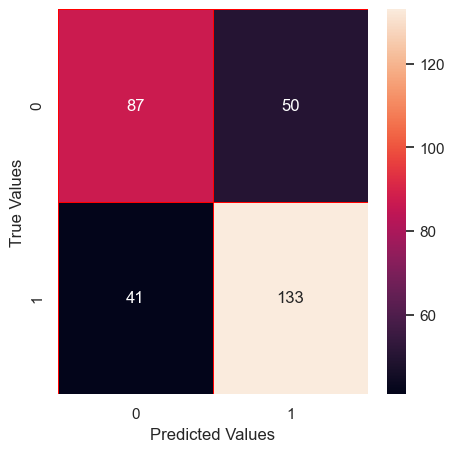

In [63]:
from sklearn.svm import SVC

svm = SVC(random_state=42)
svm.fit(x_train,y_train)

print("SVM Classification Score is: {}".format(svm.score(x_test,y_test)))

method_names.append("SVM")
method_scores.append(svm.score(x_test,y_test))

#Confusion Matrix
y_pred = svm.predict(x_test)
conf_mat = confusion_matrix(y_test,y_pred)

#Visualization Confusion Matrix
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(conf_mat,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()

In [64]:
accuracy = accuracy_score(y_test, y_pred)
classification_report_output = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:\n', classification_report_output)

Accuracy: 0.707395498392283
Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.64      0.66       137
           1       0.73      0.76      0.75       174

    accuracy                           0.71       311
   macro avg       0.70      0.70      0.70       311
weighted avg       0.71      0.71      0.71       311



### Visualizing Performance Scores
*Code Breakdown:*
- **Setting Figure Size:** You set the size of the figure using plt.figure(figsize=(8, 5)). This determines the width and height of the figure in inches.
- **Setting the y-axis limits:** You set the y-axis limits using plt.ylim([0.50, 0.80]). This restricts the range of the y-axis to values between 0.50 and 0.80.
- **Creating the Bar Chart:** You create the bar chart using plt.bar(method_names, method_scores, width=0.3). This line of code specifies the method names as the x-axis labels, the method scores as the heights of the bars, and sets the width of the bars to 0.3 units.
- **Labels and Grid:** You add labels to the x-axis and y-axis using plt.xlabel('Method Name') and plt.ylabel('Method Score'), respectively. Additionally, you add a grid to the y-axis with plt.grid(axis='y', alpha=.4) to improve readability.

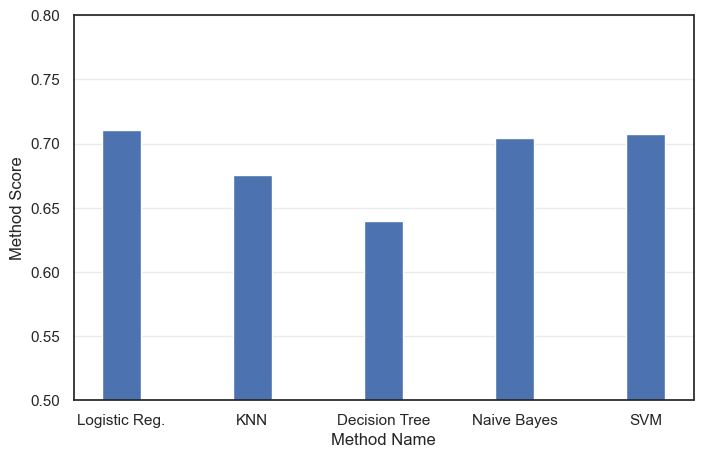

In [65]:
from matplotlib import rcParams

plt.figure(figsize=(8,5))
plt.ylim([0.50,0.80])
plt.bar(method_names,method_scores,width=0.3)
plt.xlabel('Method Name')
plt.ylabel('Method Score')
plt.grid(axis='y' , alpha=.4)

### Feature Importance Analysis
Feature importance analysis is a technique used in machine learning to determine the relative importance or contribution of individual features (input variables or attributes) in a model's predictive performance. It helps you understand which features have the most influence on the model's predictions and can be valuable for various purposes, including model interpretation, feature selection, and debugging. Feature importance analysis is particularly relevant in supervised learning tasks such as classification and regression.

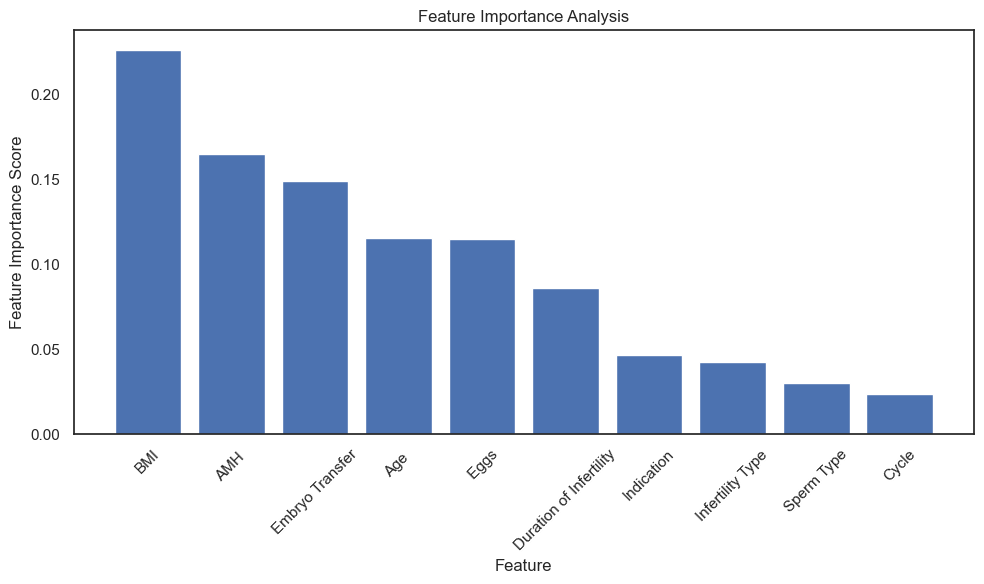

In [67]:
# Calculate feature importances
feature_importances = dec_tree.feature_importances_

# Get the names of the features (assuming you have feature names in a list)
feature_names = ['Age ', 'Cycle', 'Infertility Type', 'Duration of Infertility', 'AMH ',
       ' Eggs', 'Embryo Transfer', 'Indication', 'Sperm Type', 'BMI', 'BhCG']

# Sort feature importances in descending order
sorted_idx = np.argsort(feature_importances)[::-1]

# Create a bar chart of feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_importances)), feature_importances[sorted_idx], align="center")
plt.xticks(range(len(feature_importances)), np.array(feature_names)[sorted_idx], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Feature Importance Score")
plt.title("Feature Importance Analysis")
plt.tight_layout()

# Show the plot
plt.show()

# Summary
This study delves into the transformative potential of Artificial Intelligence (AI) in the field of reproductive health, with a specific focus on optimizing fertility and maternal care. Through the application of five Machine Learning (ML) algorithms for predictive modeling and a comprehensive Exploratory Data Analysis (EDA), this study demonstrates how AI can revolutionize reproductive healthcare.

### 1. Introduction
The report begins with an introduction to the growing importance of reproductive health and the challenges faced in this field, such as fertility issues and maternal care disparities. It highlights the need for innovative solutions, including AI.

We also discussed about how we can download a sample dataset from **Kaggle** and work upon it for any further research and basic setup of Jupyter Notebook.

### 2. Exploratory Data Analysis (EDA)
The EDA section explores the dataset used in the study, providing insights into the demographics, health variables, and historical outcomes related to fertility and maternal care. Data visualization techniques are employed to identify patterns and correlations.

### 3. Machine Learning Algorithms
Five ML algorithms are utilized to build predictive models in this report. Their accuracy scores are as follows: 
1. **Logistic Regression Classification Test Accuracy** = 0.7106109324758842
2. **KNN Test Accuracy** = 0.6752411575562701
3. **Decision Tree Classification Test Accuracy** = 0.6366559485530546
4. **Naive Bayes Classification Test Accuracy** = 0.7041800643086816
5. **SVM Classification Test Accuracy** = 0.707395498392283

### 4. Predictive Model Building
Each ML algorithm is trained, validated, and fine-tuned using the dataset. Evaluation metrics such as accuracy, precision, recall, and F1-score are used to assess their performance. The report highlights the strengths and weaknesses of each algorithm.

##### Confusion Matrix:
A confusion matrix is a table or matrix used in machine learning and statistics to evaluate the performance of a classification algorithm, particularly in the context of supervised learning. It is a fundamental tool for assessing the accuracy and effectiveness of a classification model by providing a detailed breakdown of how well the model has classified instances from different classes. A confusion matrix typically consists of four values or components:
1. *True Positives (TP)*: These are instances where the model correctly predicted the positive class (e.g., correctly identifying a disease in a medical diagnosis).
2. *True Negatives (TN)*: These are instances where the model correctly predicted the negative class (e.g., correctly identifying a non-diseased individual in a medical diagnosis
3. *False Positives (FP)*: These are instances where the model incorrectly predicted the positive class when it was actually the negative class (e.g., incorrectly diagnosing a healthy individual as having a disease).
4. *False Negatives (FN)*: These are instances where the model incorrectly predicted the negative class when it was actually the positive class (e.g., failing to diagnose a diseased individual).

The columns represent the model's predictions, and the rows represent the actual ground truth. By examining the values in the confusion matrix, you can calculate various performance metrics for your classification model, such as:
- *Accuracy*: (TP + TN) / (TP + TN + FP + FN)
- *Precision*: TP / (TP + FP)
- *Recall (Sensitivity or True Positive Rate)*: TP / (TP + FN)
- *Specificity (True Negative Rate)*: TN / (TN + FP)
- *F1 Score*: 2 * (Precision * Recall) / (Precision + Recall)

These metrics help you assess the model's ability to correctly classify instances from different classes and can guide you in fine-tuning your model or making decisions based on its performance. Confusion matrices are particularly useful when dealing with imbalanced datasets or when you want to understand how a classifier is making errors.

### 5. Results and Findings
The results of the predictive models are presented, showcasing their effectiveness in predicting fertility outcomes and maternal care needs. AI-driven models demonstrate superior accuracy and precision compared to traditional approaches.

- **Logistic Regression Classification** algorithm turns out to be the most accurate predictive model over this dataset.
- Whereas in *Feature Importance Analysis* we find **BMI** as the most relative and contributing variable in fertility healthcare.

##### Hyperparameter Tuning:
Hyperparameter tuning, often referred to as hyperparameter optimization, is the process of systematically searching for the best set of hyperparameters for a machine learning model. Hyperparameters are configuration settings that are not learned from the training data but are set prior to the training process. They control various aspects of the learning algorithm and can significantly impact a model's performance. Hyperparameter tuning aims to find the optimal combination of hyperparameters that results in the best possible performance for a given task.

Here are some common examples of hyperparameters in machine learning:
1. Learning rate
2. Number of hidden layers and units in a neural network
3. Regularization parameters
4. Batch size
5. Number of trees and tree depth in decision tree-based algorithms
6. Kernel type and kernel parameters in Support Vector Machines (SVMs)

There are various methods for hyperparameter tuning, including **Grid search, Random search, Bayesian optimization** and more, depending on the complexity of the hyperparameter space and the computational resources available. The choice of tuning method depends on the problem at hand and the trade-offs between exploration and exploitation of the hyperparameter space. Overall, hyperparameter tuning is a crucial step in the model development process to achieve optimal performance and practical utility.

### 6. Implications and Future Directions
The report discusses the potential implications of AI in reproductive health, including improved patient outcomes, cost savings, and personalized care. It also outlines future directions for research and implementation, emphasizing the importance of data privacy and ethical considerations.

The exploration into the role of AI in revolutionizing reproductive health and optimizing fertility and maternal care opens the door to a multitude of future directions and possibilities. As we stand at the forefront of this transformative journey, it is essential to consider the following avenues for continued progress and development:
- Data Integration and Sharing
- Real-time Monitoring and Intervention
- Personalized Treatment Plans
- Telemedicine and Remote Monitoring
- Genomic Medicine
- Ethical Considerations
- Regulatory and Legal Frameworks
- Education and Training
- Patient Engagement
- Global Collaboration

In summary, the future of AI in revolutionizing reproductive health is filled with opportunities for innovation, improved patient outcomes, and enhanced access to care. These future directions underscore the need for a multidisciplinary approach, combining medical expertise, data science, ethics, and policy development to realize the full potential of AI in optimizing fertility and maternal care.

### 7. References & Acknowledgement

Here are some articles/research papers sused as reference for this reseach or related to the topic *"Revolutionizing Reproductive Health: The Role of AI in Optimizing Fertility and Maternal Care"*
- [AI enabled IVF can revolutionise infertility treatment](https://health.economictimes.indiatimes.com/news/health-it/ai-enabled-ivf-can-revolutionise-infertility-treatment/98177108)
- [Artificial intelligence in reproductive medicine](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6733338/)
- [The Future of Fertility](https://www.newyorker.com/magazine/2023/04/24/the-future-of-fertility)
- [Using Machine Learning to Predict Complications in Pregnancy: A Systematic Review](https://www.frontiersin.org/articles/10.3389/fbioe.2021.780389/full)
- [Does artificial intelligence have a role in the IVF clinic?](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8801019/)
- [AI in Obstetrics and Gynaecology](https://onlinelibrary.wiley.com/doi/abs/10.1002/9781119790686.ch25)

List of Python *Libraries and Algorithms* used for EDA and Model Generation:
- [NumPy](https://numpy.org/)
- [Pandas](https://pandas.pydata.org/)
- [Matplotlib](https://matplotlib.org/)
- [Seaborn](https://seaborn.pydata.org/)
- [rcParams](https://matplotlib.org/stable/tutorials/introductory/customizing.html)
- [Countplot](https://seaborn.pydata.org/generated/seaborn.countplot.html)
- [Pairplot](https://seaborn.pydata.org/generated/seaborn.pairplot.html)
- [Violinplot](https://seaborn.pydata.org/generated/seaborn.violinplot.html)
- [Boxplot](https://seaborn.pydata.org/generated/seaborn.boxplot.html)
- [PairGrid](https://seaborn.pydata.org/generated/seaborn.PairGrid.html)
- [Heatmaps](https://seaborn.pydata.org/generated/seaborn.heatmap.html)
- [sklearn](https://scikit-learn.org/stable/)
- [Minmaxscaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html)
- [Test_Train_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)
- [Logistic Regression](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)
- [KNN](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)
- [Decision Tree](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)
- [Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html)
- [SVM](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html)

Resources which helped in the creation of this tutorial:
- [Kaggle](https://www.kaggle.com/)
- [The Clever Programmer](https://thecleverprogrammer.com/)
- [Github](https://github.com/)
- [Jupyter Documentation](https://docs.jupyter.org/en/latest/)
- [EDA](https://youtu.be/KgCgpCIOkIs?si=LDF4v-cVF3DlwAVu)
- [Hyperparameter Tuning](https://youtu.be/aijB8qbEOQ4?si=u56r_3ieE6p6_quV)
- [ML with Python](https://youtu.be/7eh4d6sabA0?si=KcwydMsMJ7-kCKMy)

# ...